In [1]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import modules.thouless_times as thouless
import modules.spectral_functions as spec_fun
import modules.sff as sff_module
import modules.adiabatics as agp
import modules.anderson as anderson
import importlib
from utils.fit_functions import *
def reload_modules():
    importlib.reload(anderson)
    importlib.reload(hfun)
    importlib.reload(cf)
    importlib.reload(thouless)
    importlib.reload(spec_fun)
    importlib.reload(agp)
    importlib.reload(sff_module)

reload_modules()

from utils.fit_functions import *
#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit
from os import sep as kPSep
from os.path import exists

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from joblib import Parallel, delayed
import copy
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors
from scipy.special import binom
import sympy as sym
from scipy.optimize import curve_fit as fit

print(cf.base_directory)
from cmath import nan


user_settings = getattr(cf.plot_settings, 'settings')

use_derivative = 0
time_dir = cf.base_directory + "timeEvolution%s"%kPSep
int_dir = cf.base_directory + "IntegratedResponseFunction%s"%kPSep
spec_dir = cf.base_directory + ("IntegratedResponseFunction%sDERIVATIVE%s"%(kPSep,kPSep) if use_derivative else "ResponseFunction%s"%kPSep)
print(exp_fit2(1.0,1.0,1.0))

../results/HEISENBERG/disorder/PBC/
2.718281828459045


# MAIN TEXT

## FIGURE 1-2 -- THOULESS TIME

### VERSUS g - perturbation strength

[16. 18.]
[16. 18.]
[16. 18.]
[16. 18.]


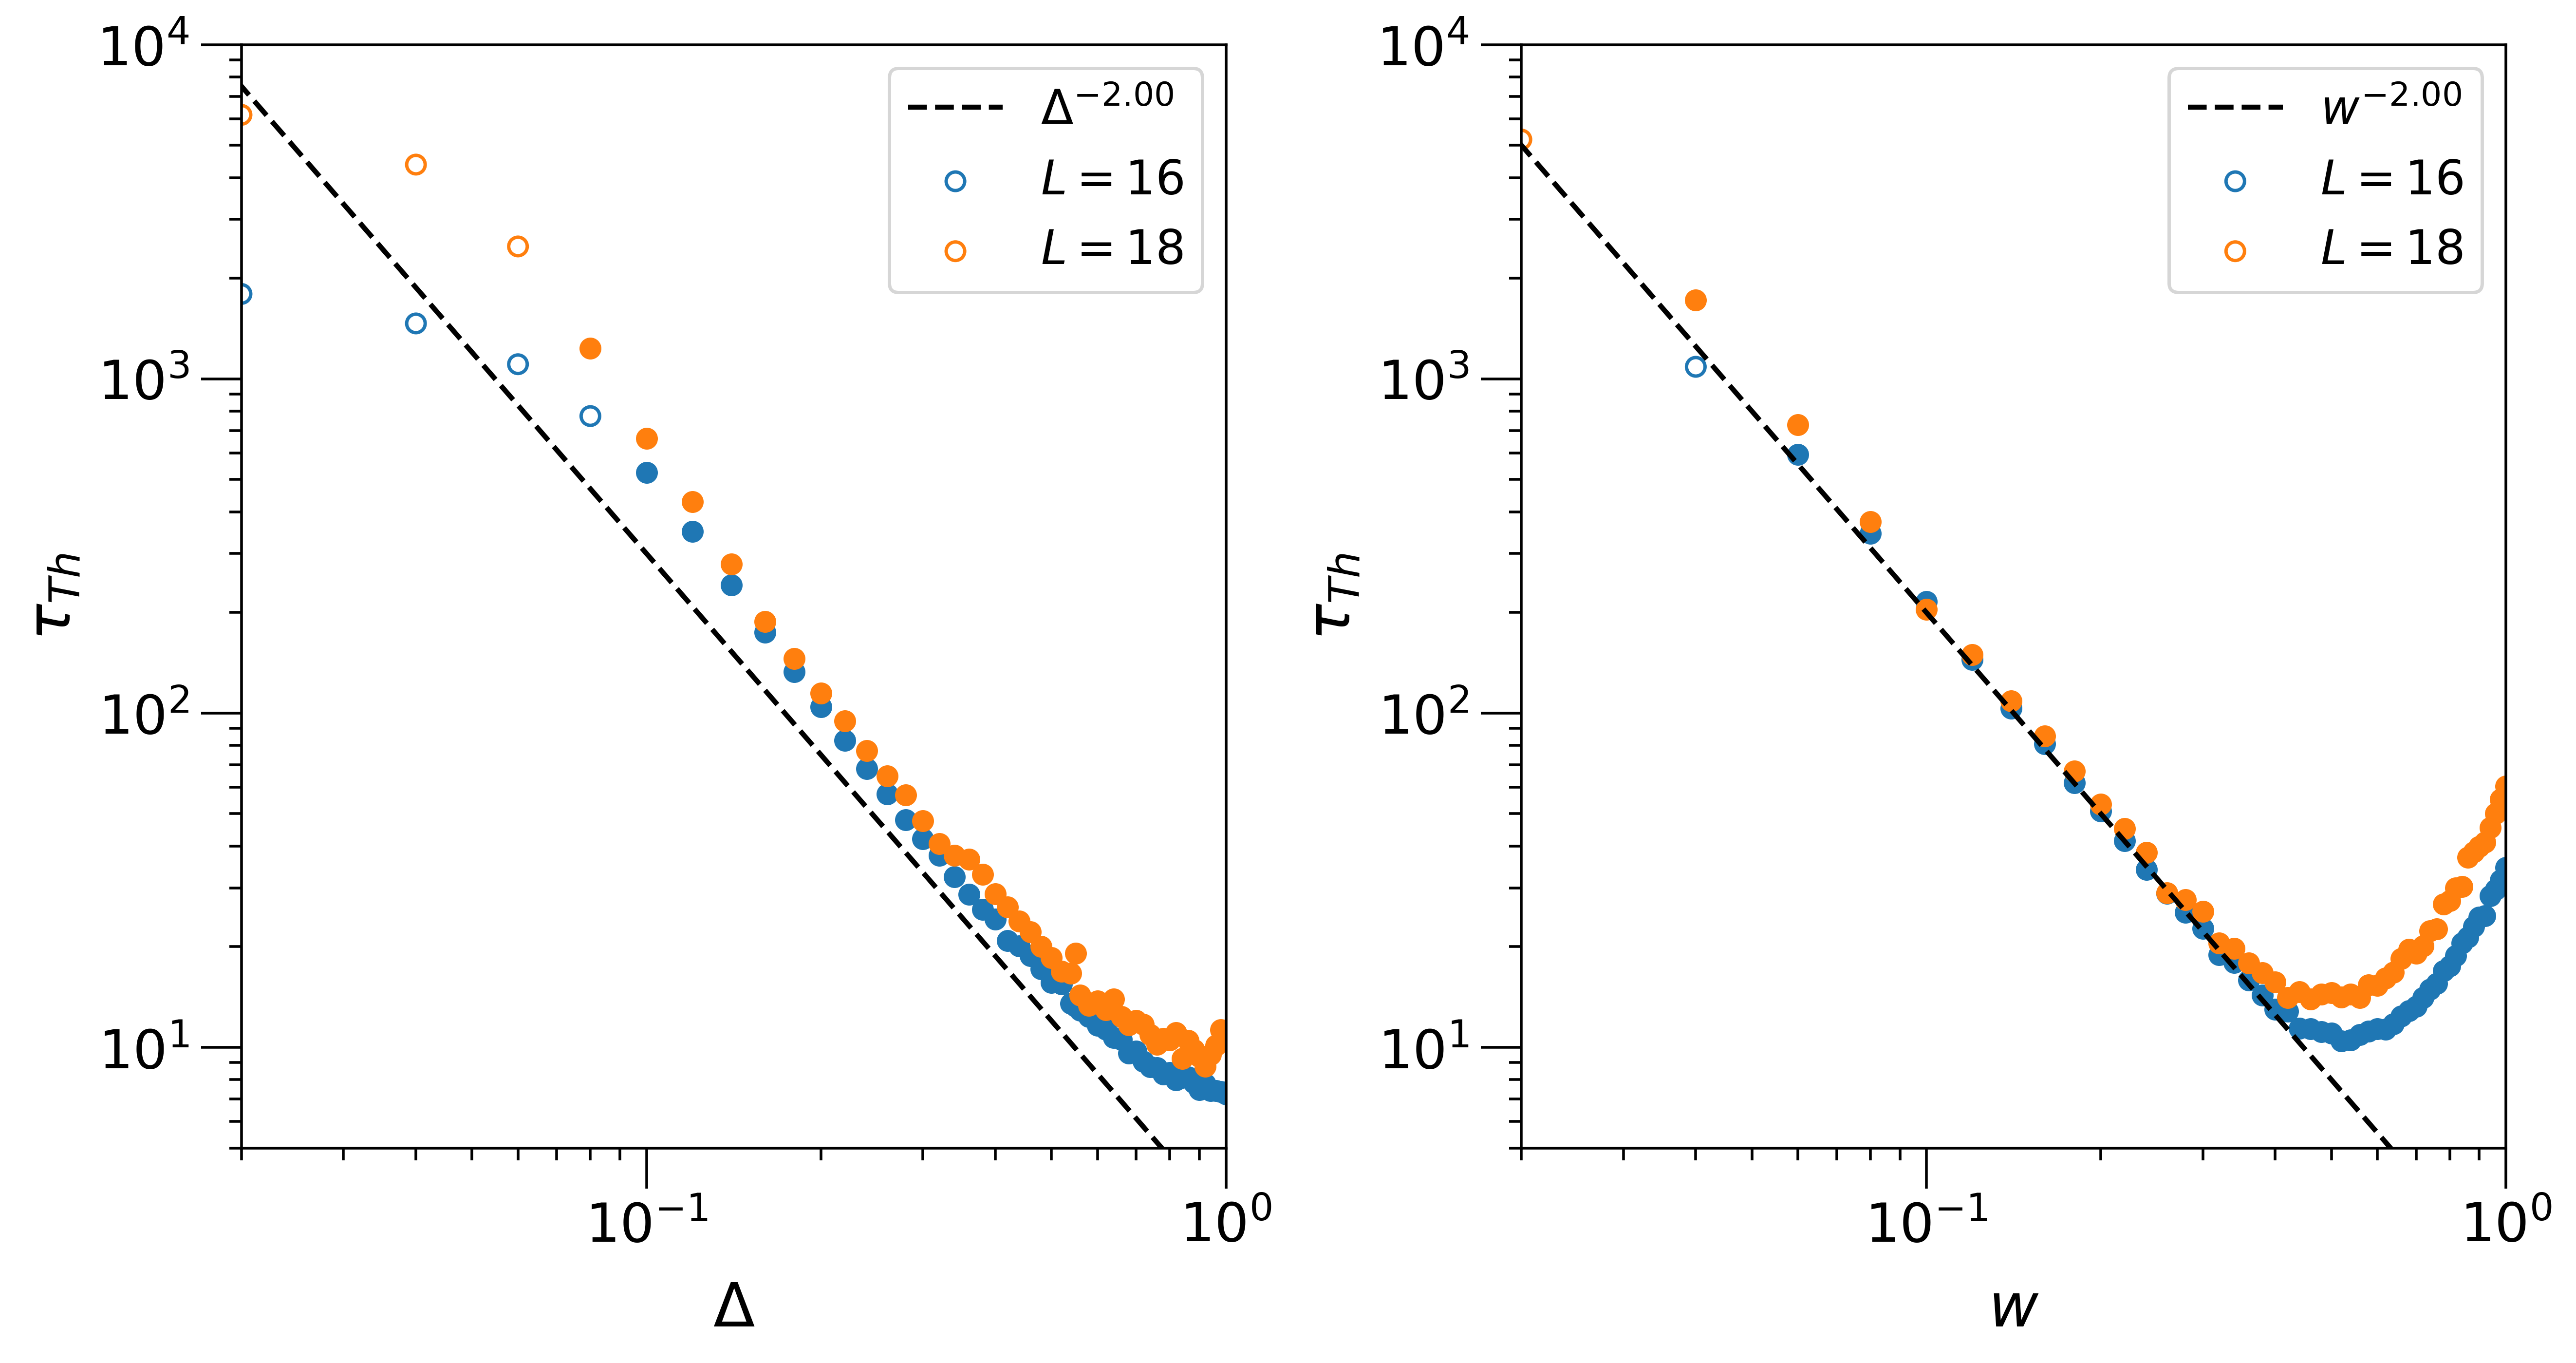

In [2]:
reload_modules()

fig, (axis1, axis2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi = 500)
vals = np.linspace(16,18,2)


def pretty_plot_why_not(axis, some_param = None):
    axis.set_ylim(5e0, 1e4)
    axis.set_xlim(2e-2, 1e0)
    axis.legend(fontsize=14)
    axis.grid(b=True, which='major', color='None', linestyle='-')
    axis.grid(b=True, which='minor', color='None', linestyle='--')
    #axis.set_axisbelow(True)

    
new_set_class = copy.deepcopy(cf.plot_settings)
new_set_class.set_vs('g')
new_set_class.set_scaling('L')
settings = getattr(new_set_class, 'settings')

x = np.linspace(0,1,100)
vals, xvals_delta, tau, gap_ratio_delta, c = thouless.plot_taus(axis=axis1, settings = settings, vals=vals, fontsize=16, linewidth=0., return_data=True)
#axis1.title.set_text(r"$w=%.2f$"%cf.params_arr[4])
n = 2.0; axis1.plot(cf.plot_settings.rescale(x, 'x'), (3e0 / (x)**n), ls='--', color='black', label=r"${\Delta}^{-%.2f}$"%(n))
pretty_plot_why_not(axis1)

new_set_class = copy.deepcopy(cf.plot_settings)
new_set_class.set_vs('w')
new_set_class.set_scaling('L')
settings = getattr(new_set_class, 'settings')

vals, xvals_w, tau, gap_ratio_w, c = thouless.plot_taus(axis=axis2, settings = settings, vals=vals, fontsize=16, linewidth=0., return_data=True)
#axis2.title.set_text(r"$\Delta=%.2f$"%cf.params_arr[2])
n = 2.0; axis2.plot(cf.plot_settings.rescale(x, 'x'), (2e0 / (x)**n), ls='--', color='black', label=r"${w}^{-%.2f}$"%(n))
pretty_plot_why_not(axis2)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig2.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig2.png")  

### size scaling

[0.24, 0.8]
[0.24 0.8 ]
[0.24 0.8 ]
[0.5, 0.8]
[0.5 0.8]
[0.5 0.8]


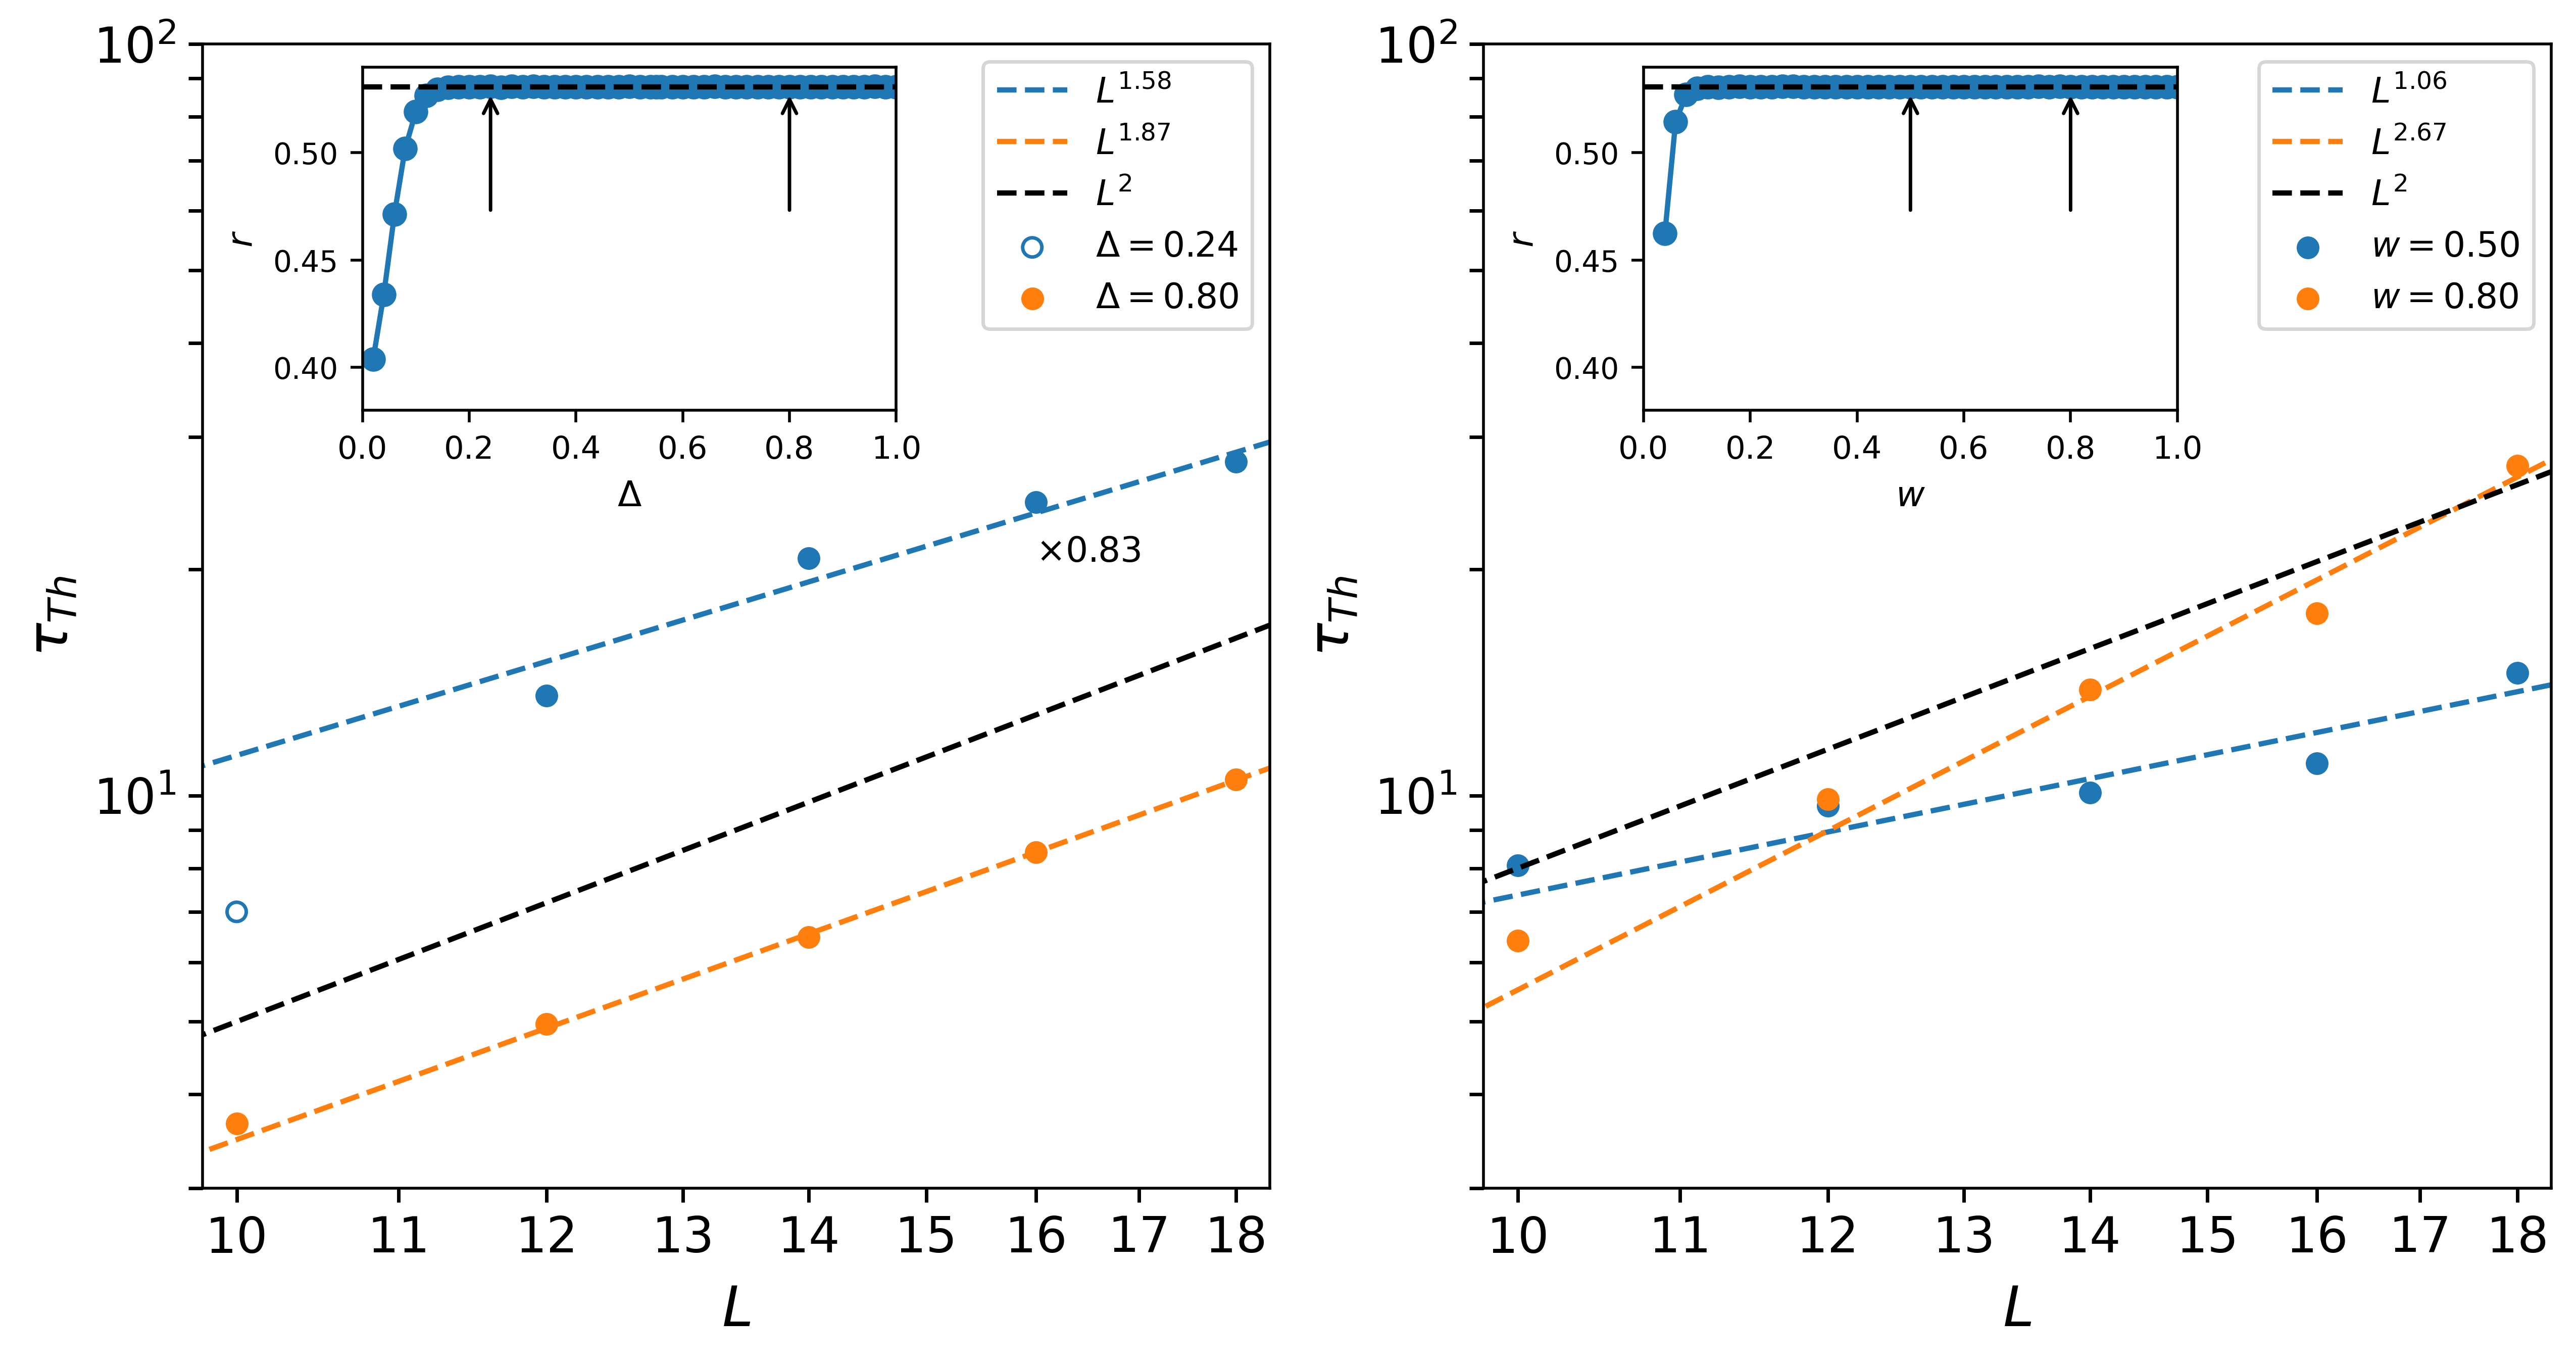

In [3]:
from turtle import settiltangle


set_class_l = copy.deepcopy(cf.plot_settings)
set_class_l.set_vs('L')
set_class_l.set_scaling('w')

set_class_r = copy.deepcopy(set_class_l)
set_class_l.set_scaling('g')
settings1 = getattr(set_class_l, 'settings')
settings2 = getattr(set_class_r, 'settings')


fig, (axis1, axis2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi = 500)

def pretty_plot_why_not(axis, x_for_r = None, gaps = None, vals = None, settings = None):
    if settings is None: settings = user_settings

    vals, xvals, tau, gap_ratio, c = thouless.plot_taus(axis=axis, settings = settings, vals=vals, fontsize=14, return_data=True)
    x=xvals;    y=tau;  colors=c
    axis.clear()
    indices = []
    for i in range(len(vals)):
        if tau[i][0] > 15:
            indices.append(i)
            tau[i] = tau[i] / tau[i][0] * 7.
            axis1.annotate(r"$\times%.2f$"%(1/1.2), xy=(16, tau[i][3] / 1.2))
    c = thouless.replot_taus(axis=axis, vals=vals, xvals=xvals, tau=tau, gap_ratio=gap_ratio, settings=settings,
                                fontsize=14)
    #L = axis1.get_legend()
    #for i in indices:
    #    txt = L.get_texts()[i]
    #    txt.set_text(txt.get_label() + r"$x\ 0.02$")

    axis.set_ylim(3e0, 1e2)
    #axis.set_xlim(8, 20)
    axis.grid(b=True, which='major', color='None', linestyle='-')
    axis.grid(b=True, which='minor', color='None', linestyle='--')
    for ax in [axis.xaxis]:
        ax.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
        ax.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
    axis.tick_params('both', length=4, width=1, which='both')
    axis.set_axisbelow(True)
    exponent = []
    error_bars = []
    aaa = np.linspace(8, 20, 100)
    if x is not None and y is not None:
        for i in range(len(x)):
            pars, pcov = fit(f=power_law, 
                            xdata=x[i][1:], 
                            ydata=y[i][1:])
            exponent.append(pars[0])
            error_bars.append(np.sqrt(np.diag(pcov)[0]))
            axis.plot(aaa, power_law(aaa, pars[0], pars[1]), linestyle='--', color=c[i], label=r"$L^{%.2f}$"%pars[0])
            
    
    axis.legend(loc='lower right')
    if x_for_r is not None and gaps is not None:
        left, bottom, width, height = [0.15, 0.68, 0.5, 0.3]
        ax = hfun.add_subplot_axes(axis, [left, bottom, width, height])
        ax.plot(x_for_r[0], gaps[0], marker='o')
        ax.set_xlim(0,1);   ax.set_ylim(0.38,0.54)
        ax.axhline(y=0.5307, linestyle='--', color='black')
        ax.set_ylabel(r"$r$")
        xlab = hfun.var_name if settings['scaling_idx'] == 2 else settings['scaling']
        ax.set_xlabel(r"$%s$"%xlab)
        #ax.grid(b=True, which='major', color='None', linestyle='--')
        for i in range(len(x)):
            ax.annotate("", xy=(vals[i], 0.53), xytext=(vals[i], 0.47), arrowprops=dict(arrowstyle="->"))


x = np.linspace(9, 20, 100)
axis1.title.set_text(r"$w=%.2f$"%cf.params_arr[4]); axis1.title.set_size(18)
pretty_plot_why_not(axis = axis1, x_for_r=xvals_delta, gaps = gap_ratio_delta, vals=[0.24, 0.8], settings=settings1)
axis1.plot(x, 0.05*x**2, linestyle='--', color='black', label=r"$L^2$")
axis1.legend()


axis2.title.set_text(r"$\Delta=%.2f$"%cf.params_arr[2]);    axis2.title.set_size(18)
pretty_plot_why_not(axis = axis2, x_for_r=xvals_w, gaps = gap_ratio_w, vals=[0.5, 0.8], settings=settings2)
axis2.plot(x, 0.08*x**2, linestyle='--', color='black', label=r"$L^2$")
axis2.legend()

plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig3.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig3.png")

## FIGURE 3-4 --  SPECTRAL FUNCTIONS

### PLOTTER FUNCTION

In [72]:
def plot_fig3(axis_time, axis_spec, vals_time = None, vals_spec = None, settings = None, _site = None, _operator = None):
    #-- set defaults
    if vals_time is None:        vals_time = hfun.get_scaling_array()
    if vals_spec is None:        vals_spec = vals_time
    if settings is None:    settings = user_settings
    if _site is None:       _site = settings['site']
    if _operator is None:   _operator = settings['operator']
    
    for i in range(0, len(vals_time)):
        x = vals_time[i]
        status, xdata, ydata, wHnow, wHtypnow = spec_fun.load_spectral(dir=time_dir, 
                                                                    settings=settings, 
                                                                    parameter=x,
                                                                    spec="time",
                                                                    normalise=True,
                                                                    operator=_operator,
                                                                    site=_site
                                                                    )
        omega_r = 0
        if status:
            xfull = xdata
            yfull = ydata
            cut = 40
            num = 500
            if x <= 0.2: 
                cut = 60
                num = 4000
            xdata = np.array([xdata[i] for i in range(0,len(xdata)) if (xdata[i] < num and xdata[i] > cut)])
            ydata = np.array([ydata[i] for i in range(0,len(ydata)) if (xfull[i] < num and xfull[i] > cut)])

            ydata = np.log10(np.abs(ydata))
            idx_zero = np.argmin((ydata))
            ydata = ydata[:idx_zero - 7]
            xdata = xdata[:idx_zero - 7]
            #
            axis_time.plot(xfull, np.log10((yfull)), label=hfun.key_title(x, settings), linewidth = 3)

            xfull = xdata
            pars, sth = fit(f=lin_fit, 
                                xdata=xdata, 
                                ydata=ydata)

            omega_r = math.e / pars[0]
            axis_time.plot(xdata, lin_fit(xdata, *pars), linestyle='--', color='black', linewidth = 3)



    #-- loop over params
    wH = [];            LTA = [];
    wH_typ = [];        val_at_typ = [];
    relax_time = [];    val_at_relax = [];
    time_minima = [];
    for i in range(0, len(vals_spec)):
        x = vals_spec[i]
        status, xdata, ydata, wHnow, wHtypnow = spec_fun.load_spectral(dir=time_dir, 
                                                                    settings=settings, 
                                                                    parameter=x,
                                                                    spec="time",
                                                                    normalise=True,
                                                                    operator=0,
                                                                    site=_site
                                                                    )

        omega_r = 0
        if status:
            xfull = xdata
            yfull = ydata
            cut = 40
            num = 500
            if x <= 0.2: 
                cut = 60
                num = 4000
            xdata = np.array([xdata[i] for i in range(0,len(xdata)) if (xdata[i] < num and xdata[i] > cut)])
            ydata = np.array([ydata[i] for i in range(0,len(ydata)) if (xfull[i] < num and xfull[i] > cut)])

            ydata = np.log10(np.abs(ydata))
            idx_zero = np.argmin((ydata))
            time_minima.append(xdata[idx_zero])
            ydata = ydata[:idx_zero - 7]
            xdata = xdata[:idx_zero - 7]
            #

            xfull = xdata
            pars, sth = fit(f=lin_fit, 
                                xdata=xdata, 
                                ydata=ydata)

            omega_r = np.log10(math.e) / pars[0]


        status, xdata, ydata, wHnow, wHtypnow = spec_fun.load_spectral(dir=spec_dir, 
                                                                    settings=settings, 
                                                                    parameter=x,
                                                                    spec="spec",
                                                                    operator = _operator,
                                                                    site = _site
                                                                    )
        if status:
            ydata = ydata * (2**x / x if settings['scaling_idx'] == 0 else 2**cf.L / cf.L) # rescale by D
            p = axis_spec.plot(xdata, ydata,label=hfun.key_title(x, settings), linewidth=3, markersize=10)
            wH.append(wHnow);               idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - wHnow));        LTA.append(ydata[idx])
            wH_typ.append(wHtypnow);        idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - wHtypnow));     val_at_typ.append(ydata[idx])
            relax_time.append(omega_r);     idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - omega_r));      val_at_relax.append(ydata[idx])
    
    axis_spec.plot(wH, LTA, linestyle='--', marker='o', color='black', linewidth=2, markersize=10, label=r"$\omega_H$")
    axis_spec.plot(wH_typ, val_at_typ, linestyle='--', marker='o', color='black', markerfacecolor='None', linewidth=2, markersize=10, label=r"$\omega_H^{typ}$")
    axis_spec.plot(relax_time, val_at_relax, linestyle='--', marker='s', color='black', markerfacecolor='None', linewidth=2, markersize=10, label=r"$1/\tau_r$")
    name = "\\sigma^z_{L/2}" if _operator == 0 else "H_{L/2}"
    
    hfun.set_plot_elements(axis = axis_time, ylabel = "log_{10}\\left|\\langle " + name + "(t)" + name + "\\rangle\\right|", xlabel = "t", settings=settings, 
                            font_size=14, set_legend=True, xlim=(None, None), ylim=(None, None))

    axis_time.legend(frameon=True, loc = 'best')
    hfun.set_plot_elements(axis = axis_spec, ylabel = "D\\cdot\\left\\langle|\\left(" + name + "\\right)_{nm}|^2\\right\\rangle", xlabel = "\\omega", settings=settings, 
                            font_size=14, set_legend=True, xlim=(None, None), ylim=(None, None))
    axis_spec.legend(frameon=True, loc='lower left')
    axis_spec.set_ylim(5e-2, 6e0)

    axis_time.set_xscale('linear')
    axis_time.set_yscale('linear')
    axis_time.set_xlim(1, max(time_minima))
    axis_time.set_ylim(-5,0)
    x=np.linspace(1e-2, 1, 100)
    axis_spec.plot(x, 0.4 / x**0.5, linestyle=':', color='black')
    axis_spec.annotate(r"$\omega^{-0.5}$", xy=(0.2, 1.0), size=14)

    #axis_spec.grid(b=True, which='major', color='0.65', linestyle='-')
    #axis_spec.grid(b=True, which='minor', color='0.85', linestyle='--')
    #axis_time.grid(b=True, which='major', color='0.65', linestyle='-')
    #axis_time.grid(b=True, which='minor', color='0.85', linestyle='--')


### $\Delta=0.55=const$

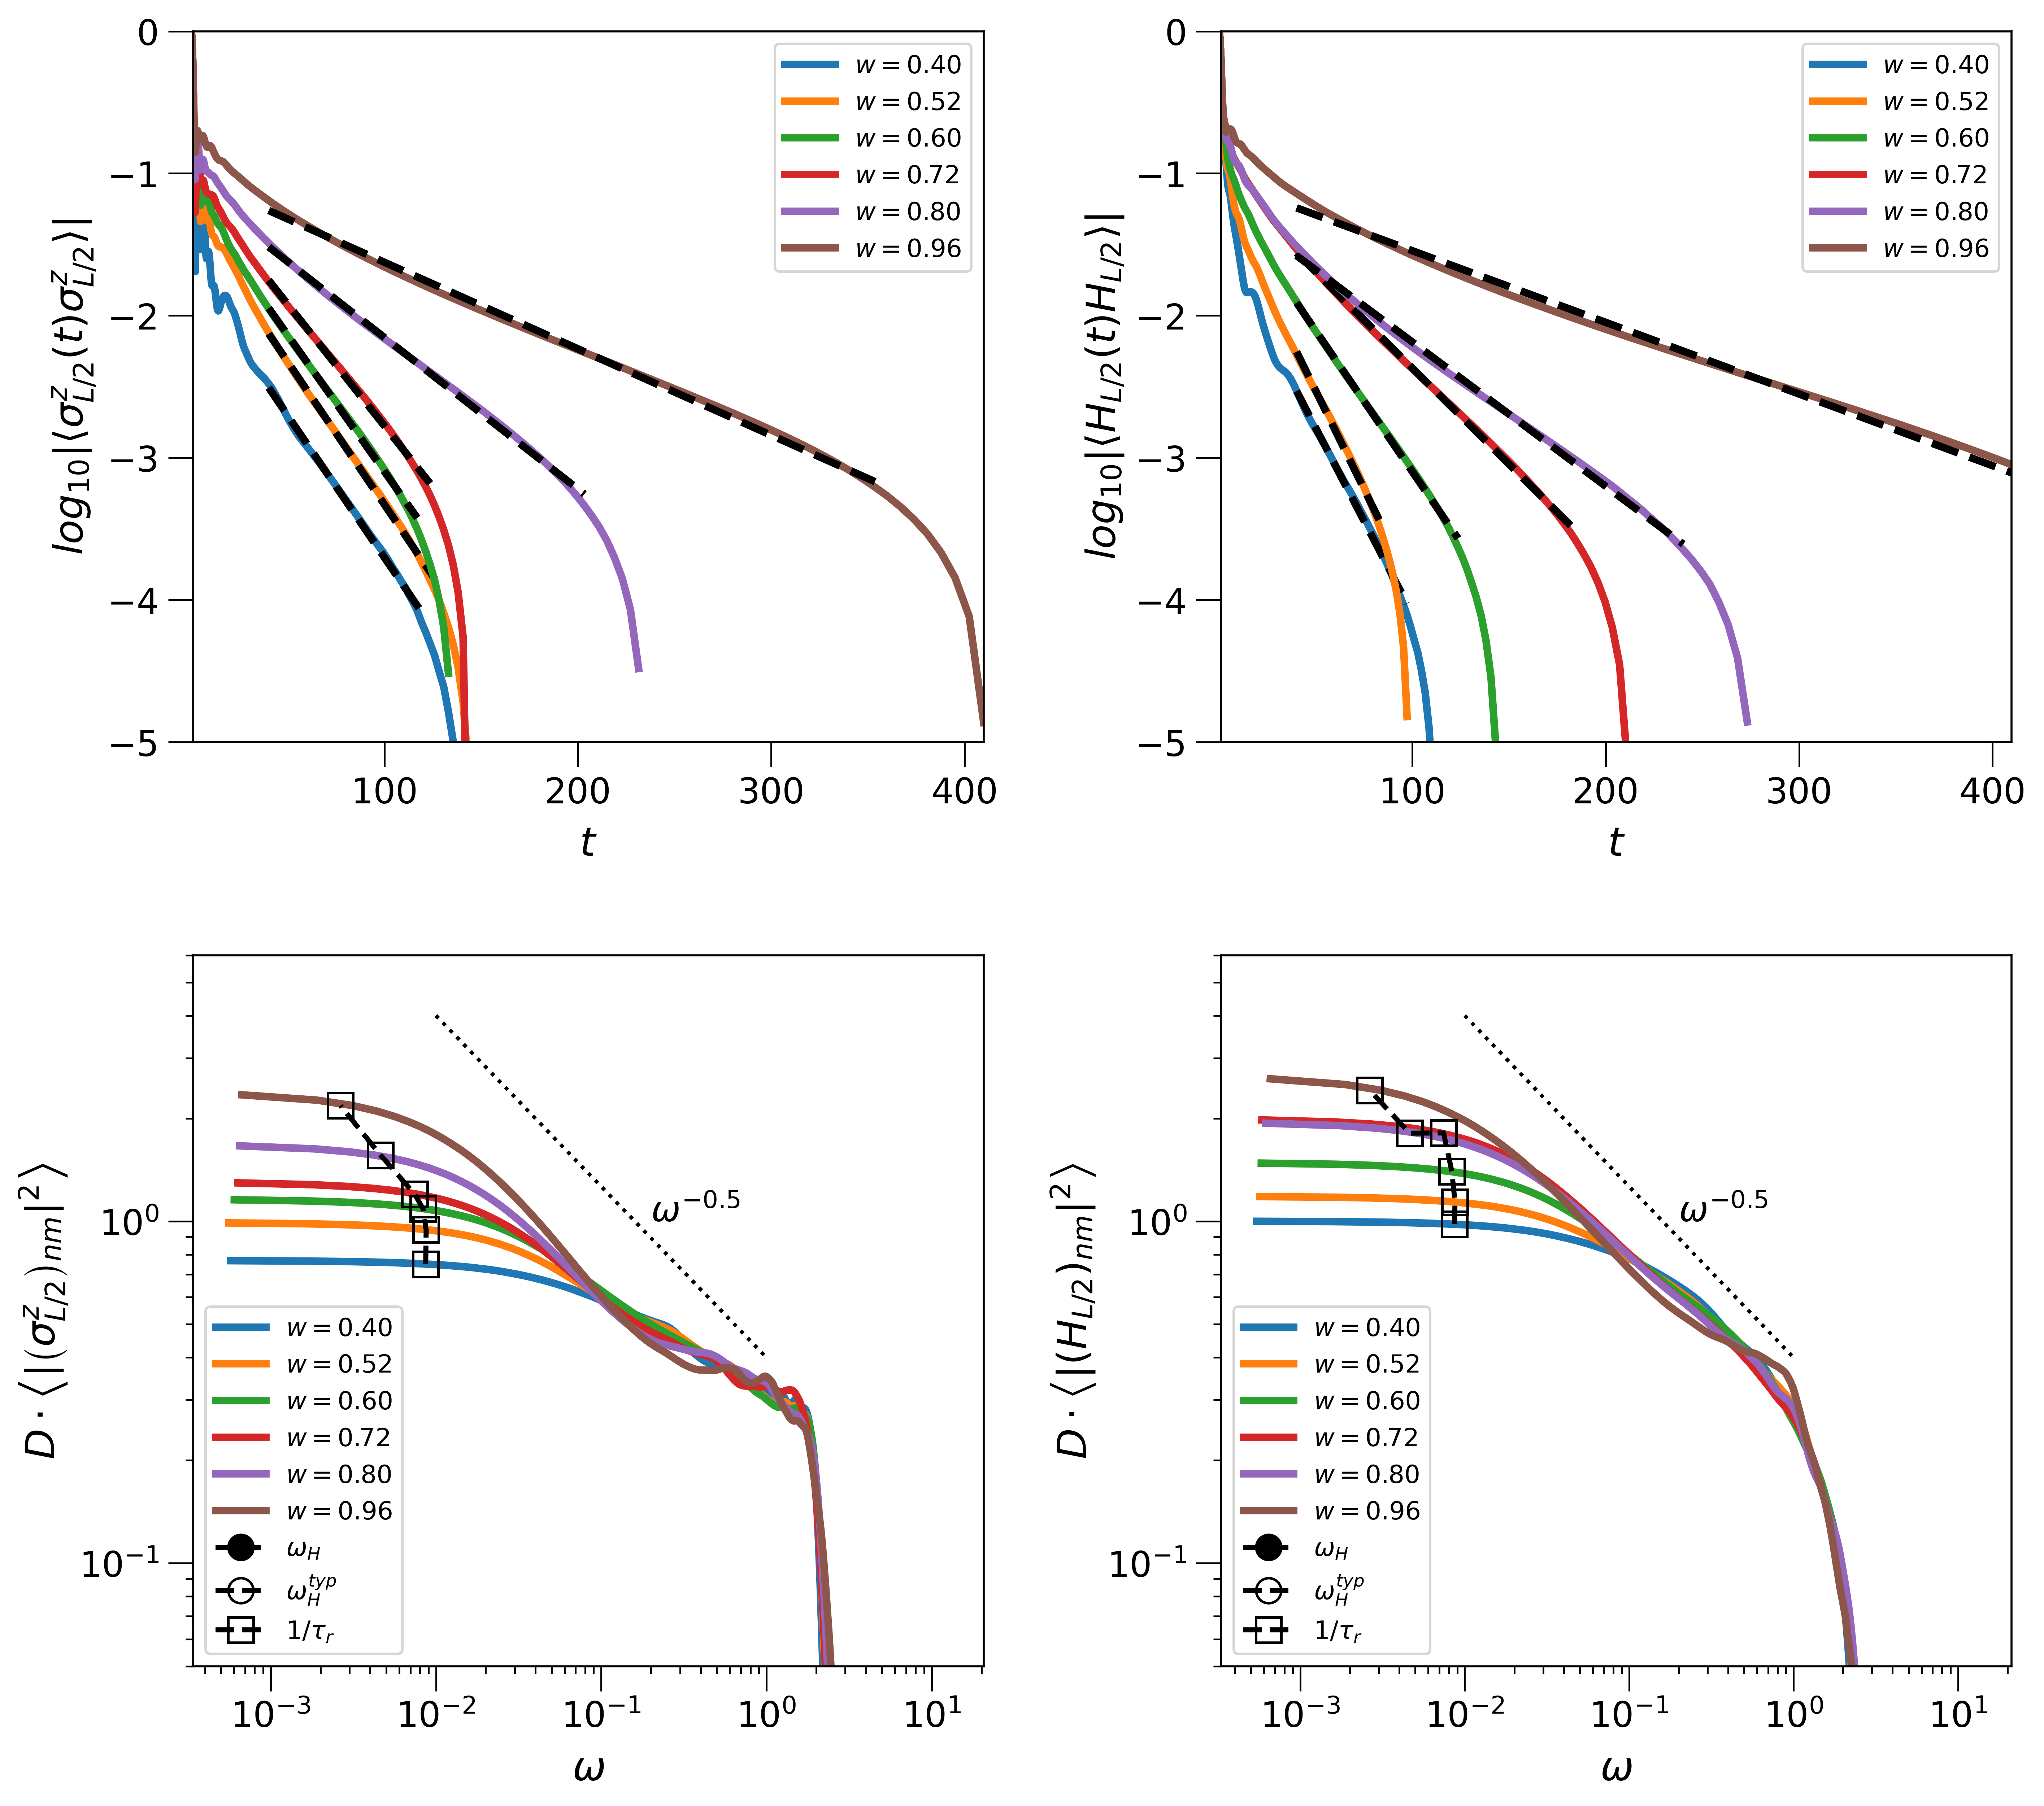

In [66]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(13,12), dpi = 500)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
set_class_fig3 = copy.deepcopy(cf.plot_settings)
set_class_fig3.set_vs('x')
set_class_fig3.set_scaling('w')
settings = getattr(set_class_fig3, 'settings')

vals = hfun.get_scaling_array(settings=settings, 
                                    x0=0.52, 
                                    xend=1.02, 
                                    dx=0.08)
vals = np.array([0.4, 0.52, 0.60, 0.72, 0.80, 0.96])
plot_fig3(axis_time=ax1, axis_spec=ax3, _operator=0, vals_time=vals, settings=settings)
plot_fig3(axis_time=ax2, axis_spec=ax4, _operator=2, vals_time=vals, settings=settings)
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig4.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig4.png")

### $w=0.7=const$

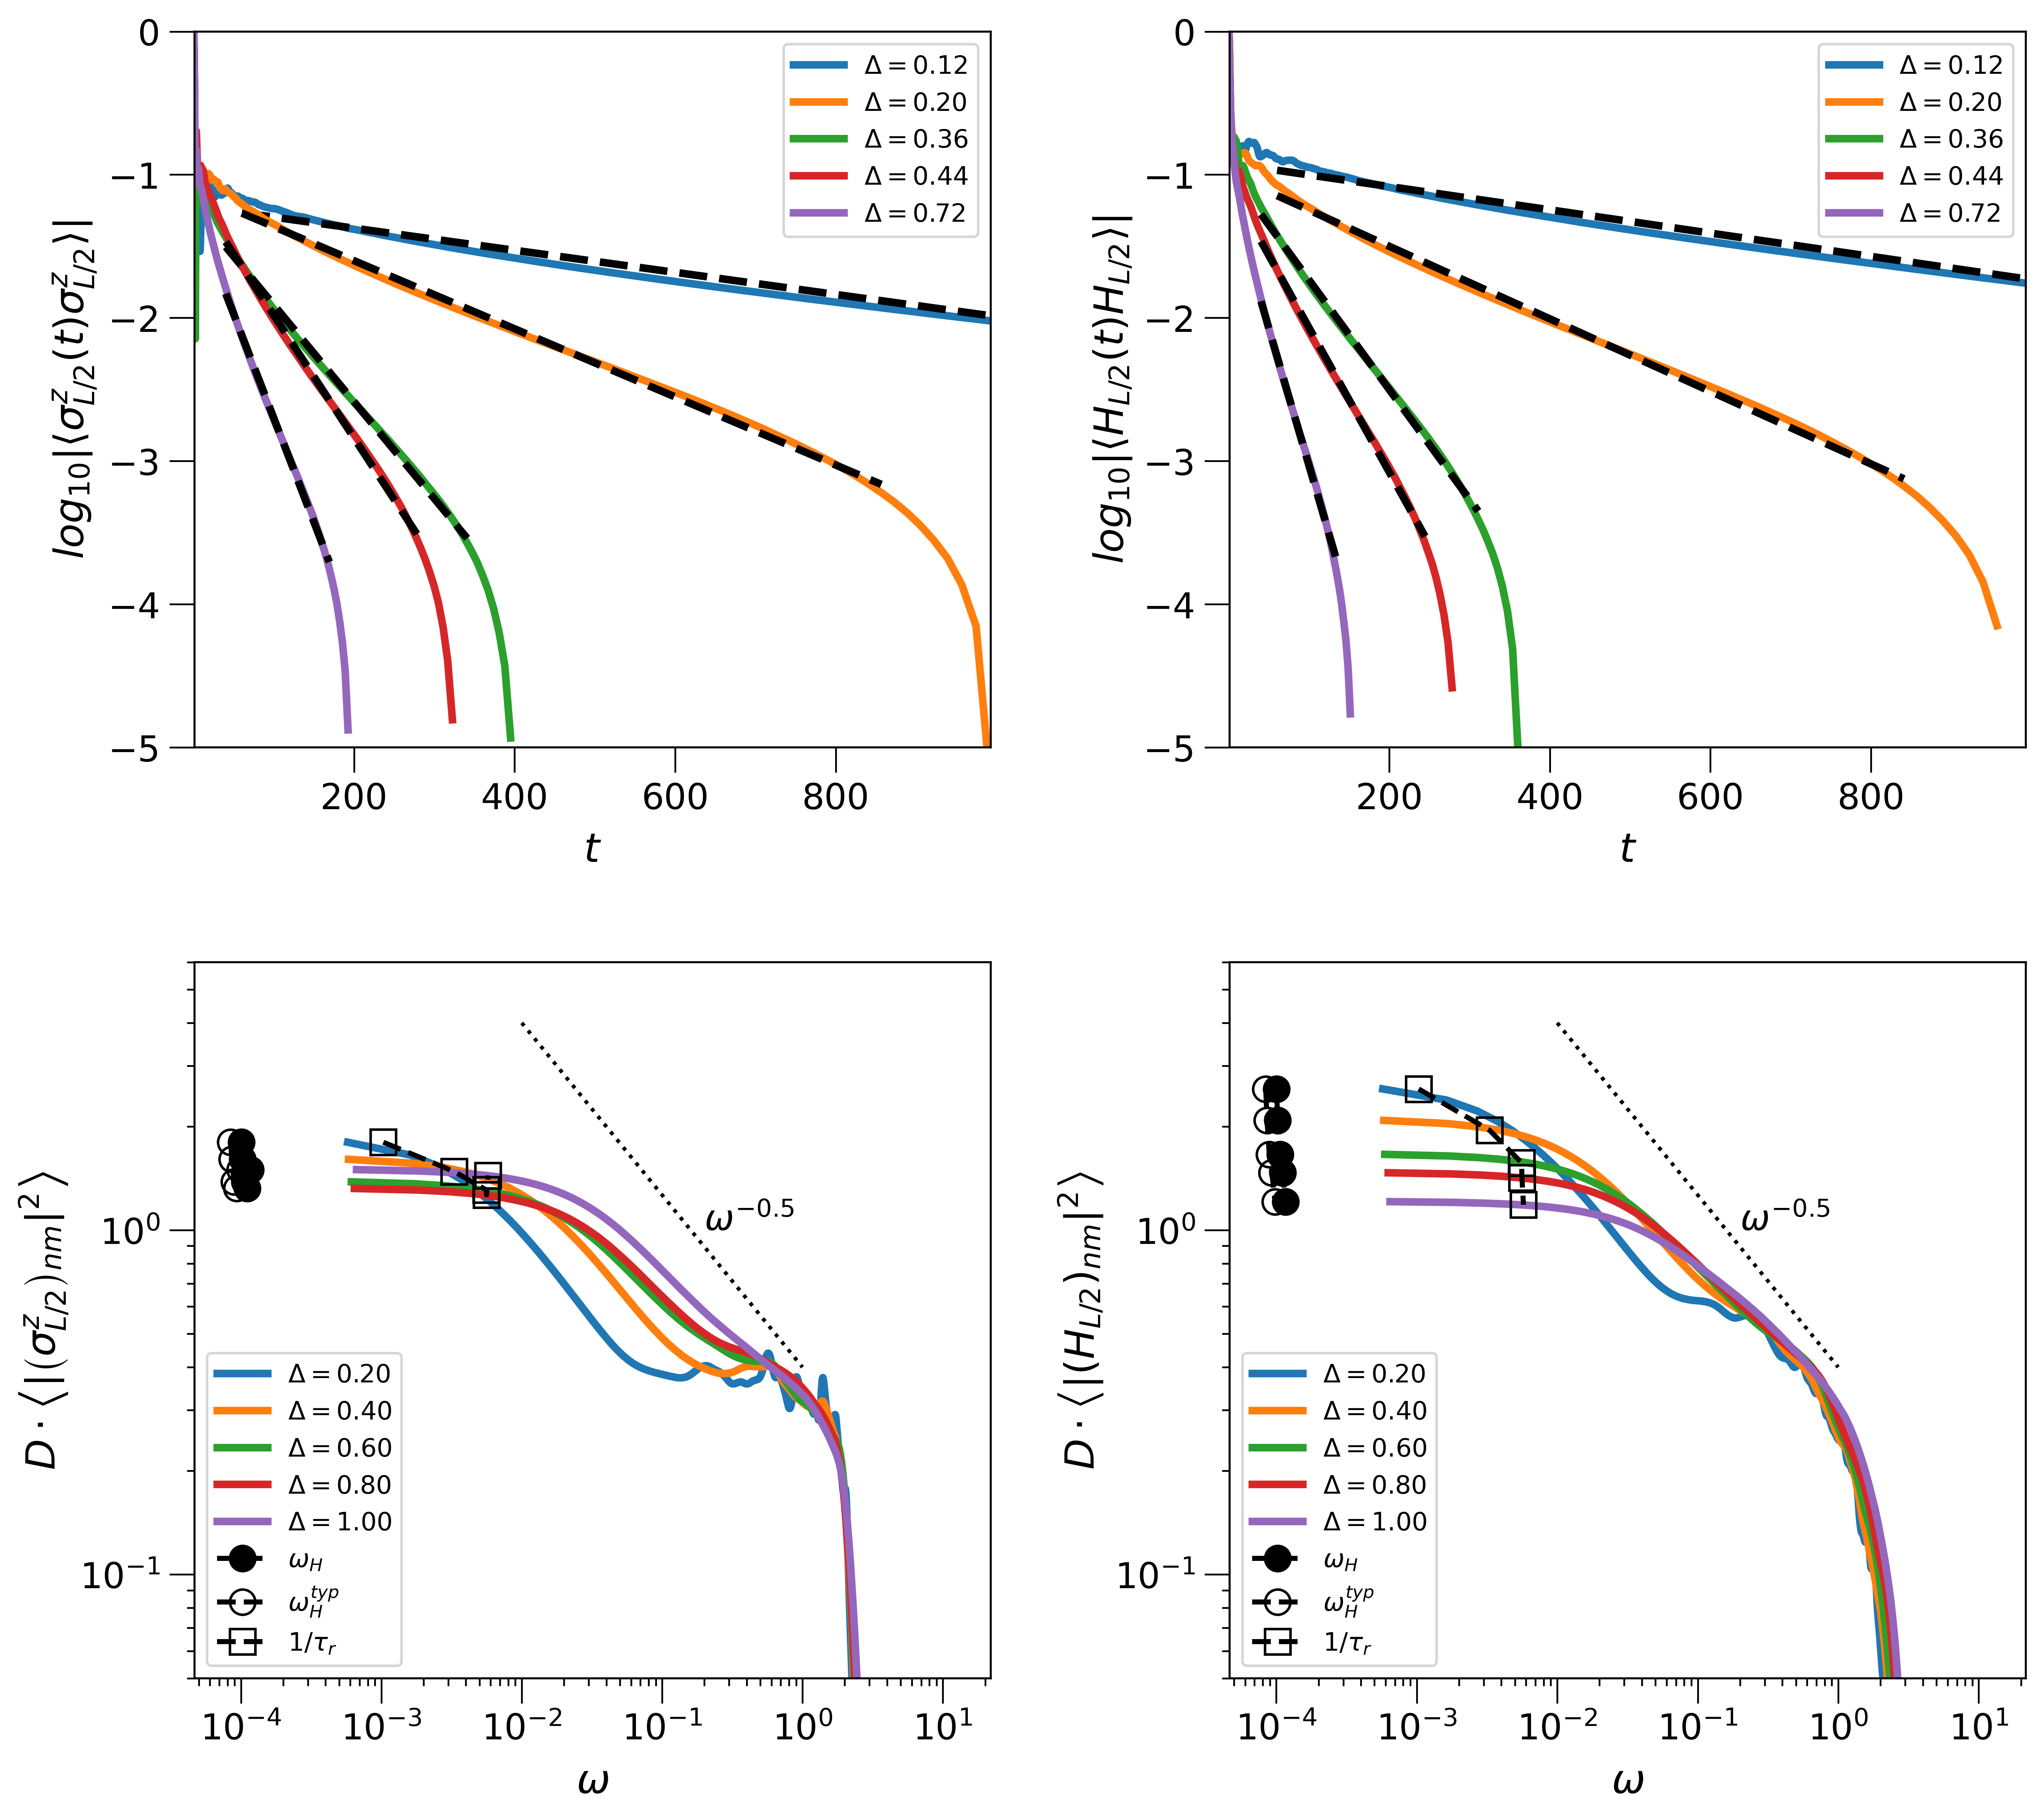

In [73]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(13,12), dpi = 500)

fig.subplots_adjust(wspace=0.3, hspace=0.3)
set_class_fig3 = copy.deepcopy(cf.plot_settings)
set_class_fig3.set_vs('x')
set_class_fig3.set_scaling('g')
settings = getattr(set_class_fig3, 'settings')

vals = hfun.get_scaling_array(settings=settings, 
                                    x0=0.1, 
                                    xend=0.62, 
                                    dx=0.1)

vals = np.array([0.12, 0.2, 0.36, 0.44, 0.72])
vals_spec = hfun.get_scaling_array(settings=settings, 
                                    x0=0.2, 
                                    xend=1.02, 
                                    dx=0.2)
# ADD DELTA 0.8, 1.0 to spec fun
plot_fig3(axis_time=ax1, axis_spec=ax3, _operator=0, vals_time=vals, vals_spec=vals_spec, settings=settings)
plot_fig3(axis_time=ax2, axis_spec=ax4, _operator=2, vals_time=vals, vals_spec=vals_spec, settings=settings)

plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig5.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig5.png")

## FIGURE 5 --  RELAXATION TIMES

[12 14 16 18]
[12 14 16 18]
[12 14 16 18]
[12 14 16 18]
[12 14 16 18]
[12 14 16 18]


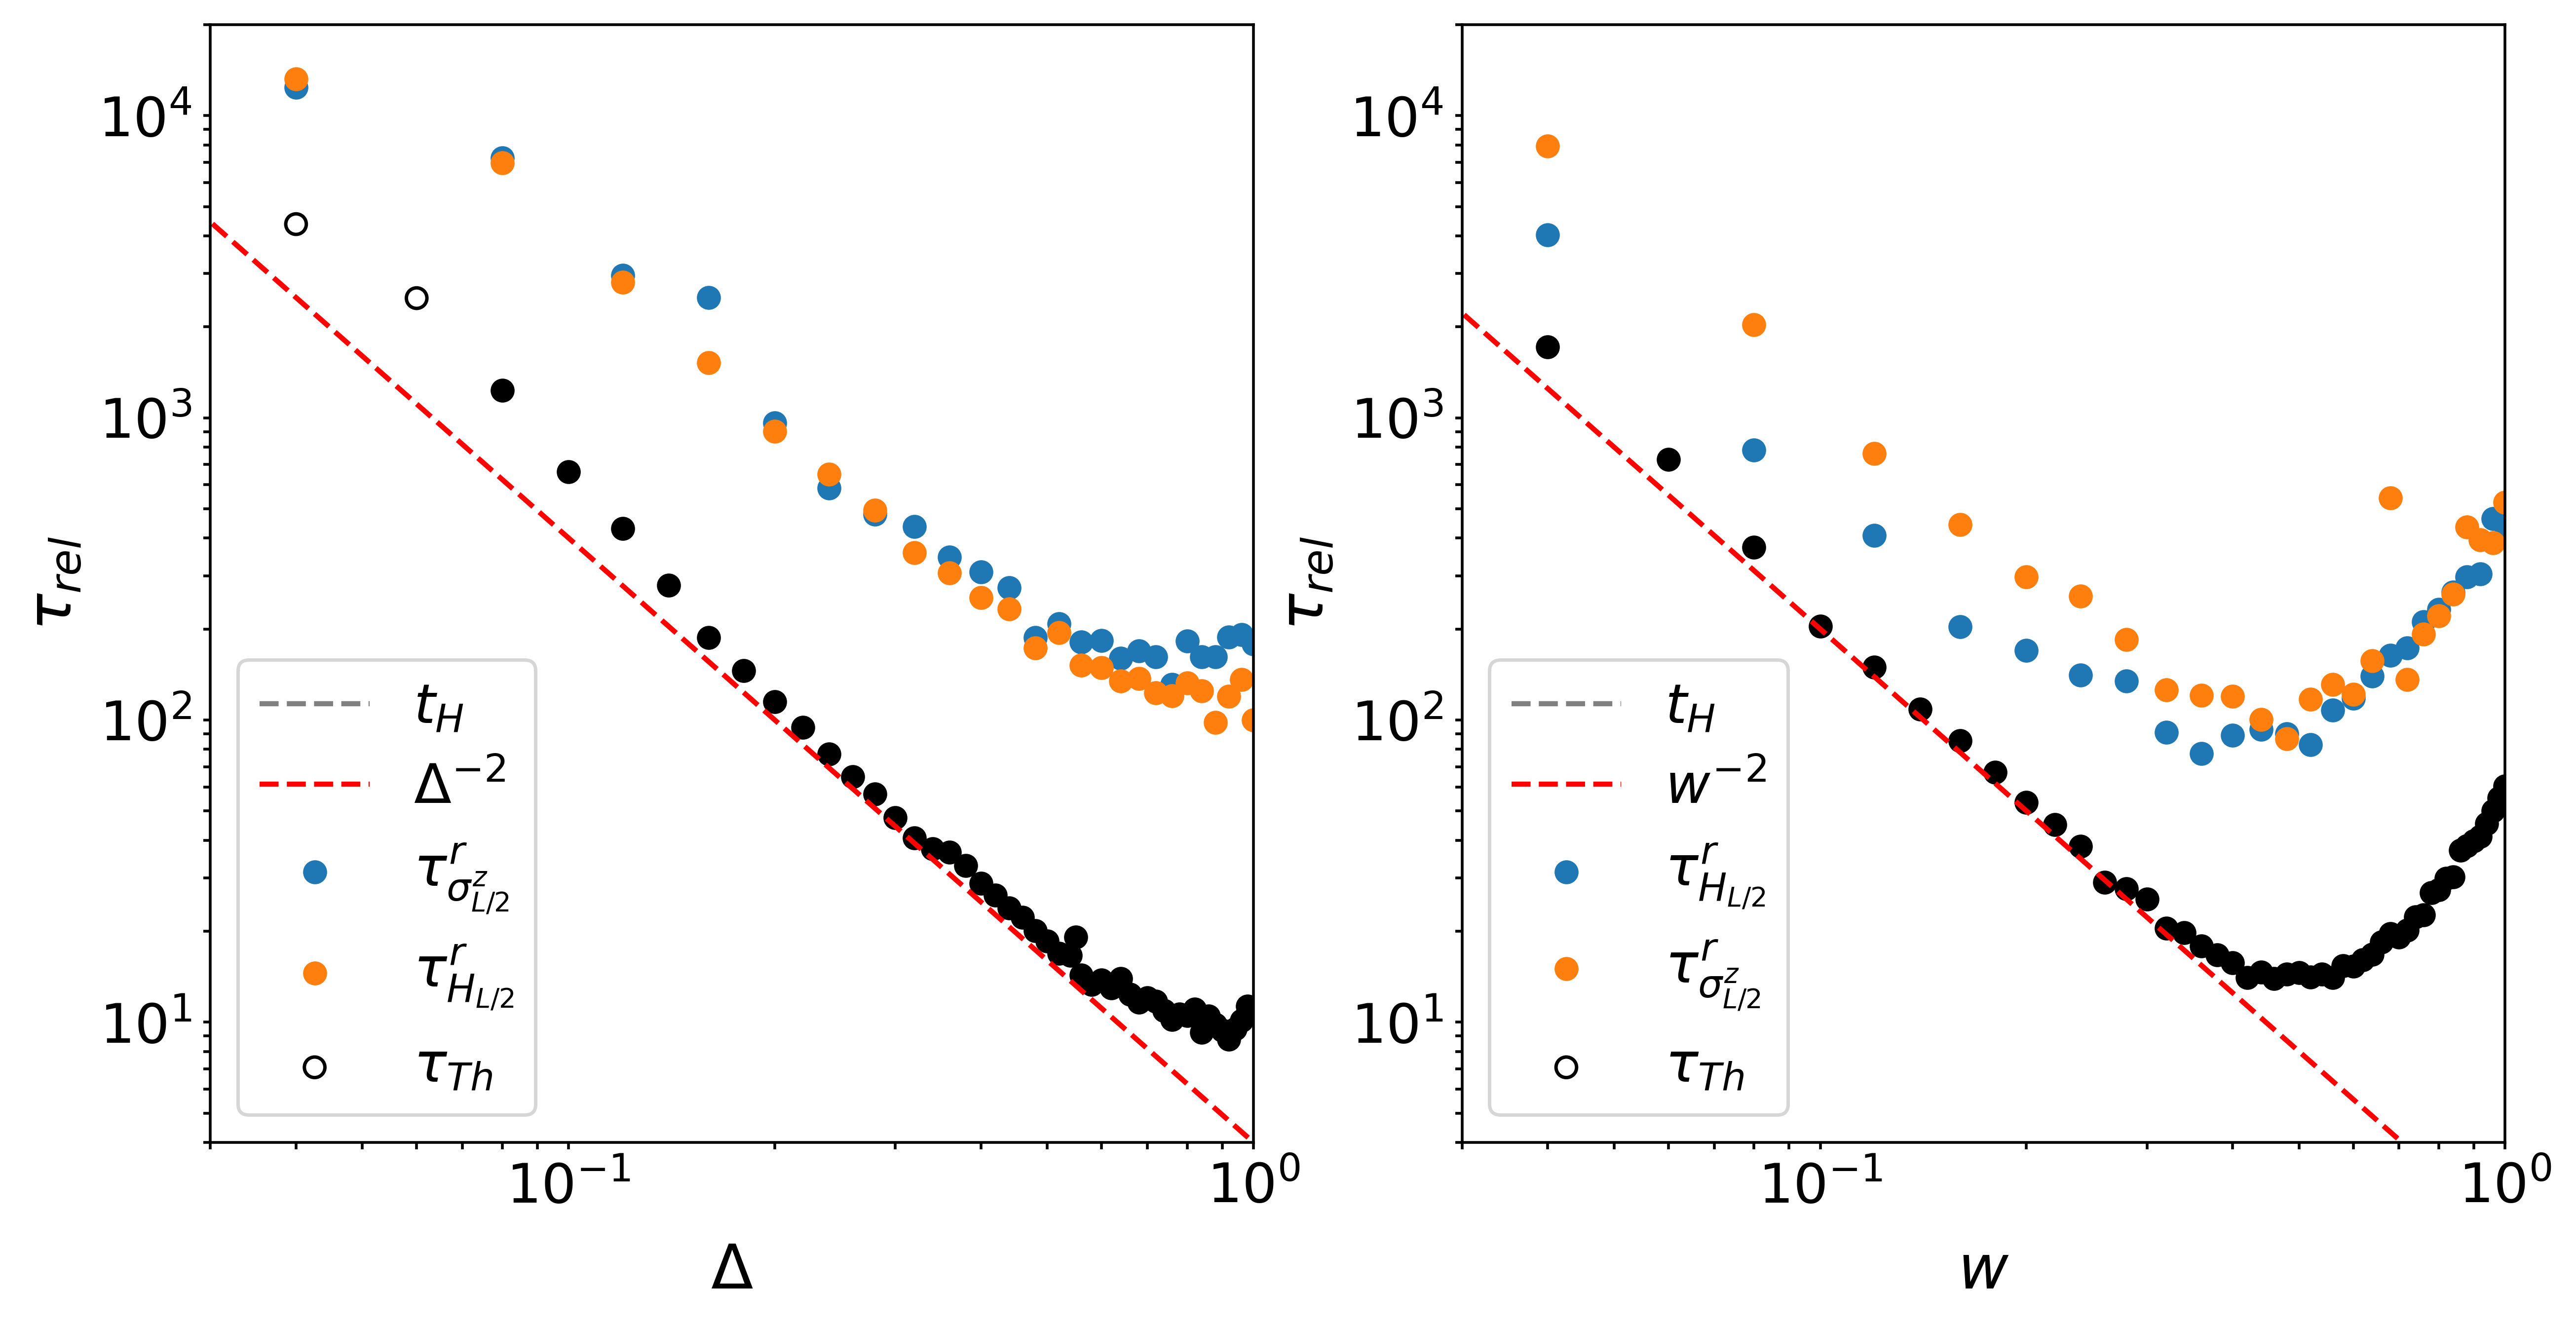

In [59]:
reload_modules()
fig, (axis1, axis2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi = 500)

vals = np.linspace(0.02, 1.00, 50)
set_class_fig5a = copy.deepcopy(cf.plot_settings)
set_class_fig5a.set_vs('L')
set_class_fig5a.set_scaling('g')

set_class_fig5b = copy.deepcopy(set_class_fig5a)
set_class_fig5b.set_scaling('w')

def plot_relax_time(axis, new_set_class, vals, _operator1, _operator2):
    if new_set_class is None:
        new_set_class = cf.plot_settings
    settings = getattr(new_set_class, 'settings')
    status_time, taus, tau_r1, tau_r_fit1, tH, tH_typ, gap_ratio = spec_fun.get_relax_times(vals=vals, set_class=new_set_class, operator=_operator1)
    status_time, taus, tau_r2, tau_r_fit2, tH, tH_typ, gap_ratio = spec_fun.get_relax_times(vals=vals, set_class=new_set_class, operator=_operator2)

    ii = settings['scaling_idx']
    xlab = "q/\\pi" if ii == 5 else (hfun.var_name if ii == 2 else settings['scaling'])

    def name(_operator): 
        return "\\sigma^z_{L/2}" if _operator == 0 else "H_{L/2}"
    axis.scatter(vals, tau_r_fit1, marker='o', label=r"$\tau^r_{%s}$"%name(_operator1))
    axis.scatter(vals, tau_r_fit2, marker='o', label=r"$\tau^r_{%s}$"%name(_operator2))
    axis.plot(vals, tH, linestyle='--', label=r"$t_H$", color='gray')
    
    #axis.plot(vals, tH_typ, linestyle=':', label=r"$t_H^{typ}$", color='gray')

    #axis.plot(vals, 1e0 / vals**1., linestyle='--', color='black', label=r"$%s^{-1}$"%xlab)

    set_class_th = copy.deepcopy(new_set_class)
    set_class_th.set_vs(settings['scaling'])
    set_class_th.set_scaling('L')
    sett = getattr(set_class_th, 'settings')
    try :
        tau_data = thouless.load(sett)
        status_time = True
    except OSError:
        status_time = False
        print("No Thouless data present")
    if status_time == False or cf.model == 2: print('No data')
    else:
        idx = list(tau_data[0]).index(cf.L)
        #thouless.replot_taus(axis=axis,  vals=list(tau_data[0][idx]),
        #                                 xvals=list(tau_data[1][idx]), 
        #                                 tau=list(tau_data[2][idx]), 
        #                                 gap_ratio=list(tau_data[3][idx]), 
        #                                 settings=sett)
        
        for i in range(len(tau_data[1][idx])):
            mfc = 'None' if np.abs(tau_data[3][idx][i] - 0.53) > 0.01 else 'black'
            if i == 0:  axis.scatter(tau_data[1][idx][i], tau_data[2][idx][i], edgecolor='black', marker='o', facecolor=mfc, label=r"$\tau_{Th}$")
            else:       axis.scatter(tau_data[1][idx][i], tau_data[2][idx][i], edgecolor='black', marker='o', facecolor=mfc)
#
    spec_fun.set_inset_style(axis, vals, settings)
    axis.set_ylim(4, 2e4)
    axis.set_xlim(3e-2, 1e0)


plot_relax_time(axis=axis1, new_set_class=set_class_fig5a, vals=vals, _operator1=0, _operator2=2)
axis1.plot(vals, 4e0 / vals**2, linestyle='--', color='red', label=r"$%s^{-2}$"%hfun.var_name)
axis1.legend(loc='lower left', ncol=1, fontsize=16)

plot_relax_time(axis=axis2, new_set_class=set_class_fig5b, vals=vals, _operator1=2, _operator2=0)
axis2.plot(vals, 2e0 / vals**2, linestyle='--', color='red', label=r"$w^{-2}$")
axis2.legend(loc='lower left', ncol=1, fontsize=16)

plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig6.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig6.png")

## FIGURE 6-7 --  COLLAPSED DATA FOR BOTH CASES - CRITICAL POINTS

### COST FUNCTION MINIMZATION

In [124]:
import costfun.costfun as cost
def typical(data):
    return np.exp(np.sum(np.log(data) / len(data)))

basedir = "./CriticalParameters/"
sizes = range(12, 19, 2)
def load_critical_data(crit_fun = 'free', scaling_ansatz = 'FGR', set_class = None):
    if set_class is None: set_class = cf.plot_settings
    settings = getattr(set_class, 'settings')
    vs = settings['vs']

    cost_fun = []
    crit_exp = []
    crit_exp2 = []
    crit_pars = []
    critical_fun = cost.crit_functions_dict[crit_fun]
    for file in os.listdir(basedir):
        info = hfun.remove_info(hfun.info_param(cf.params_arr), settings['scaling'], settings['vs'])
        prefix = "GapRatio" + info + "_critfun=%s_ansatz=%s_pert=%s_seed"%(crit_fun, scaling_ansatz, vs)
        if file.startswith(prefix):
            file = basedir + file
            if os.path.exists(file):
                data = np.load(file)
                cost_fun.append(data['costfun'])
                crit_exponents = data["crit exp'"]
                if scaling_ansatz == 'FGR'  or scaling_ansatz == 'spacing':
                    crit_exp.append(crit_exponents[0])
                    if len(crit_exponents) > 1:
                        crit_exp2.append(crit_exponents[1])
                else:
                    crit_exp.append(crit_exponents)
                critics = []
                for i in range(len(data) - 2):
                    critics.append(data["x_%d"%i])
                crit_pars.append(np.array(critics))
    
    num_of_sizes = len(crit_pars[0])
    crit_pars = np.transpose(crit_pars)
    return np.array(cost_fun), np.array(crit_exp), np.array(crit_exp2), np.array(crit_pars), num_of_sizes

set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('g')
settings = getattr(set_class, 'settings')
cost_fun, crit_exp, crit_exp2, crit_pars, num_of_crit = load_critical_data(set_class=set_class)



print(np.median(crit_exp), np.median(crit_exp2))
print([typical(crit_pars[i]) for i in range(num_of_crit)])

def plot_collapsed_data(axis, vs = 'g', crit_fun = 'free', scaling_ansatz = 'FGR', x = None, y = None, sizes = None, wH = None):
    
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    use_gap_ratio = False
    
    if x is None or y is None:
        vals, xvals, tau, gap_ratio = thouless.load(settings=settings)
        x = xvals
        y = gap_ratio
        sizes = vals
        use_gap_ratio = True
        x = []
        y = []
        wH_loc = []
        sizes = np.array(range(12,19,2))
        for xpar in sizes:
            cf.params_arr[settings['scaling_idx']] = xpar
            filename = cf.base_directory + "STATISTICS" + os.sep + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat" 
            if os.path.exists(filename):
                stats = hfun.read_python_saved_dat_file(filename)
                r_tmp = stats[1]
                x.append(np.array([stats[0][i] for i, r in enumerate(r_tmp) if r > 0.40]))
                y.append(np.array([stats[1][i] for i, r in enumerate(r_tmp) if r > 0.40]))
                wH_loc.append(np.array([stats[5][i] for i, r in enumerate(r_tmp) if r > 0.40]))
        x = np.array(x)
        if wH is None:
            wH = wH_loc
    cost_fun, crit_exp, crit_exp2, crit_pars, num_of_sizes = load_critical_data(crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, set_class=set_class)
    num_of_sizes = min(num_of_sizes, len(sizes))
    lab = hfun.var_name if settings['vs_idx'] == 2 else vs
    cost_fun = np.mean(cost_fun)
    crit_exp = np.mean(crit_exp)
    crit_exp2 = np.mean(crit_exp2)
    crit_pars = np.array([np.median(crit_pars[i]) for i in range(num_of_sizes)])
    
    
    rescale_fun = cost.resc_functions_dict[scaling_ansatz]
    critical_fun = cost.crit_functions_dict[crit_fun]
    
    
    g_c_dev_GOE = []
    for i in range(num_of_sizes):
        idx = 0
        var = 0
        while var < 0.525: var = y[i][idx];  idx += 1;
        g_c_dev_GOE.append(x[i][idx])

        xpoints = []
        if scaling_ansatz == 'FGR':         
            xpoints = rescale_fun(x[i], sizes[i], critical_fun, crit_exp, crit_exp2, *crit_pars)
        elif scaling_ansatz == 'spacing':   
            xpoints = rescale_fun(x[i], sizes[i], critical_fun, crit_exp, *crit_pars) * np.array(wH[i])**crit_exp2
        else:                               
            xpoints = rescale_fun(x[i], sizes[i], critical_fun, crit_exp, *crit_pars)
        axis.scatter(xpoints, y[i],s=8, label=r"$L=%d$"%sizes[i])
    
    xlab = cost.scale_ansatz_label[scaling_ansatz](lab)
    
    hfun.set_plot_elements(axis = axis, ylabel = "r", xlabel = xlab, settings=settings, 
                            font_size=8, set_legend=False, xlim=(None, None), ylim=(None, None))
    axis.set_xscale('linear')
    axis.set_yscale('linear')
    if use_gap_ratio:
        axis.axhline(y=0.5307, xmin=0.35, xmax = 1, ls='--', color='black')
        axis.axhline(y=0.3867, xmin = 0, xmax=0.35, ls='--', color='black')
        axis.set_ylim(0.375, 0.54)
    width = 0.4
    height = 0.4
    left, bottom, width, height = [1 - width, 0.15, width, height / 0.8]
    ax = hfun.add_subplot_axes(axis, [left, bottom, width, height])
    sizes = np.array([12 + 2 * i for i in range(num_of_sizes)])


    #p2 = ax.plot(sizes, g_c_dev_GOE, color='red', label=r"$%s_c$"%lab, linewidth=0, marker = 'o')
    
    #ax.plot(sizes, np.array(fit_func(sizes, 1.0, 1/3.)) / fit_func(sizes[0], 1.0, 1/3.) * crit_pars[0], linestyle='--', color='red', label=r"$\sqrt[3]{\omega_H}$")
    def plot_fit(crit, label = r"$%s^*$"%lab, plot_line = True, color = 'black'):
        wH_at_crit = []
        for i in range(num_of_sizes):
            idx = min(range(len(wH[i])), key=lambda j: abs(wH[i][j] - crit[i]))
            wH_at_crit.append(wH[i][idx])
        wH_at_crit = np.array(wH_at_crit)
        
        print(wH_at_crit, crit)
        pars, pcov = fit(f=power_law, 
                            xdata=wH_at_crit[1:], 
                            ydata=crit[1:])
        #print(pars[1])
        fit_name = r"$\omega_H^{%.2f}$"%pars[0]
        
        if plot_line:
            aabb = np.logspace(-4.3, -2, 100)
            ax.set_xlim(0.5 * min(wH_at_crit), 1.5 * max(wH_at_crit))
            ax.plot(aabb, 2*aabb**0.5, linestyle='--', color='blue', label=r"$\sqrt{\omega_H}$")
        p = ax.plot(wH_at_crit, crit, color=color, label=label + fit_name, linewidth=0, marker = 'o')
        ax.plot(wH_at_crit, power_law(wH_at_crit, *pars), linestyle='--', color=p[0].get_color())
    
    plot_fit(crit = crit_pars, label = r"$%s^*\sim$"%lab, color = 'black')
    if use_gap_ratio:
        plot_fit(crit = g_c_dev_GOE, label = r"$%s_c\sim$"%lab, plot_line = False, color = 'red')
    
    if vs == 'g':
        S_c_crossing = [0.083, 0.044, 0.031, 0.023]
        plot_fit(crit = S_c_crossing, label = r"$%s^S(L, L-2)\sim$"%lab, plot_line = False, color = 'green')

    hfun.set_plot_elements(axis = ax, ylabel = lab + "_c", xlabel = "\\omega_H", settings=settings, 
                            font_size=8, set_legend=False, xlim=(None, None), ylim=(None, None))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.75), frameon = True, fontsize = 8, ncol=1)
    
    titlee = r"$CF=%.4f\qquad\nu=%.4f$"%(cost_fun, 1./crit_exp if scaling_ansatz == 'classic' else crit_exp )
    if scaling_ansatz == 'spacing':
        crit_exp2 = -1. / crit_exp2
    if scaling_ansatz == 'FGR' or scaling_ansatz == 'spacing':
        titlee += r"$\quad\mu=%.4f$"%crit_exp2
    axis.set_title(titlee)


1.4380308493083915 1.4364192051153668
[0.07364737875023045, 0.06658730686491614, 0.05355557311713603, 0.04062380666858061]


### GAP RATIO

[12 14 16 18]
[0.00512281 0.00147442 0.00041837 0.0001168 ] [0.10921506 0.08081148 0.05988363 0.04343527]
[0.00512281 0.00147442 0.00041837 0.0001168 ] [0.29, 0.19, 0.13, 0.083]
[0.00512281 0.00147442 0.00041837 0.0001168 ] [0.083, 0.044, 0.031, 0.023]
[12 14 16 18]
[5.0963695e-03 1.4692930e-03 4.1718100e-04 9.4138133e-05] [0.11097903 0.06673236 0.04071274 0.02424218]
[5.0963695e-03 1.4692930e-03 4.1718100e-04 9.4138133e-05] [0.26, 0.14, 0.08, 0.048]


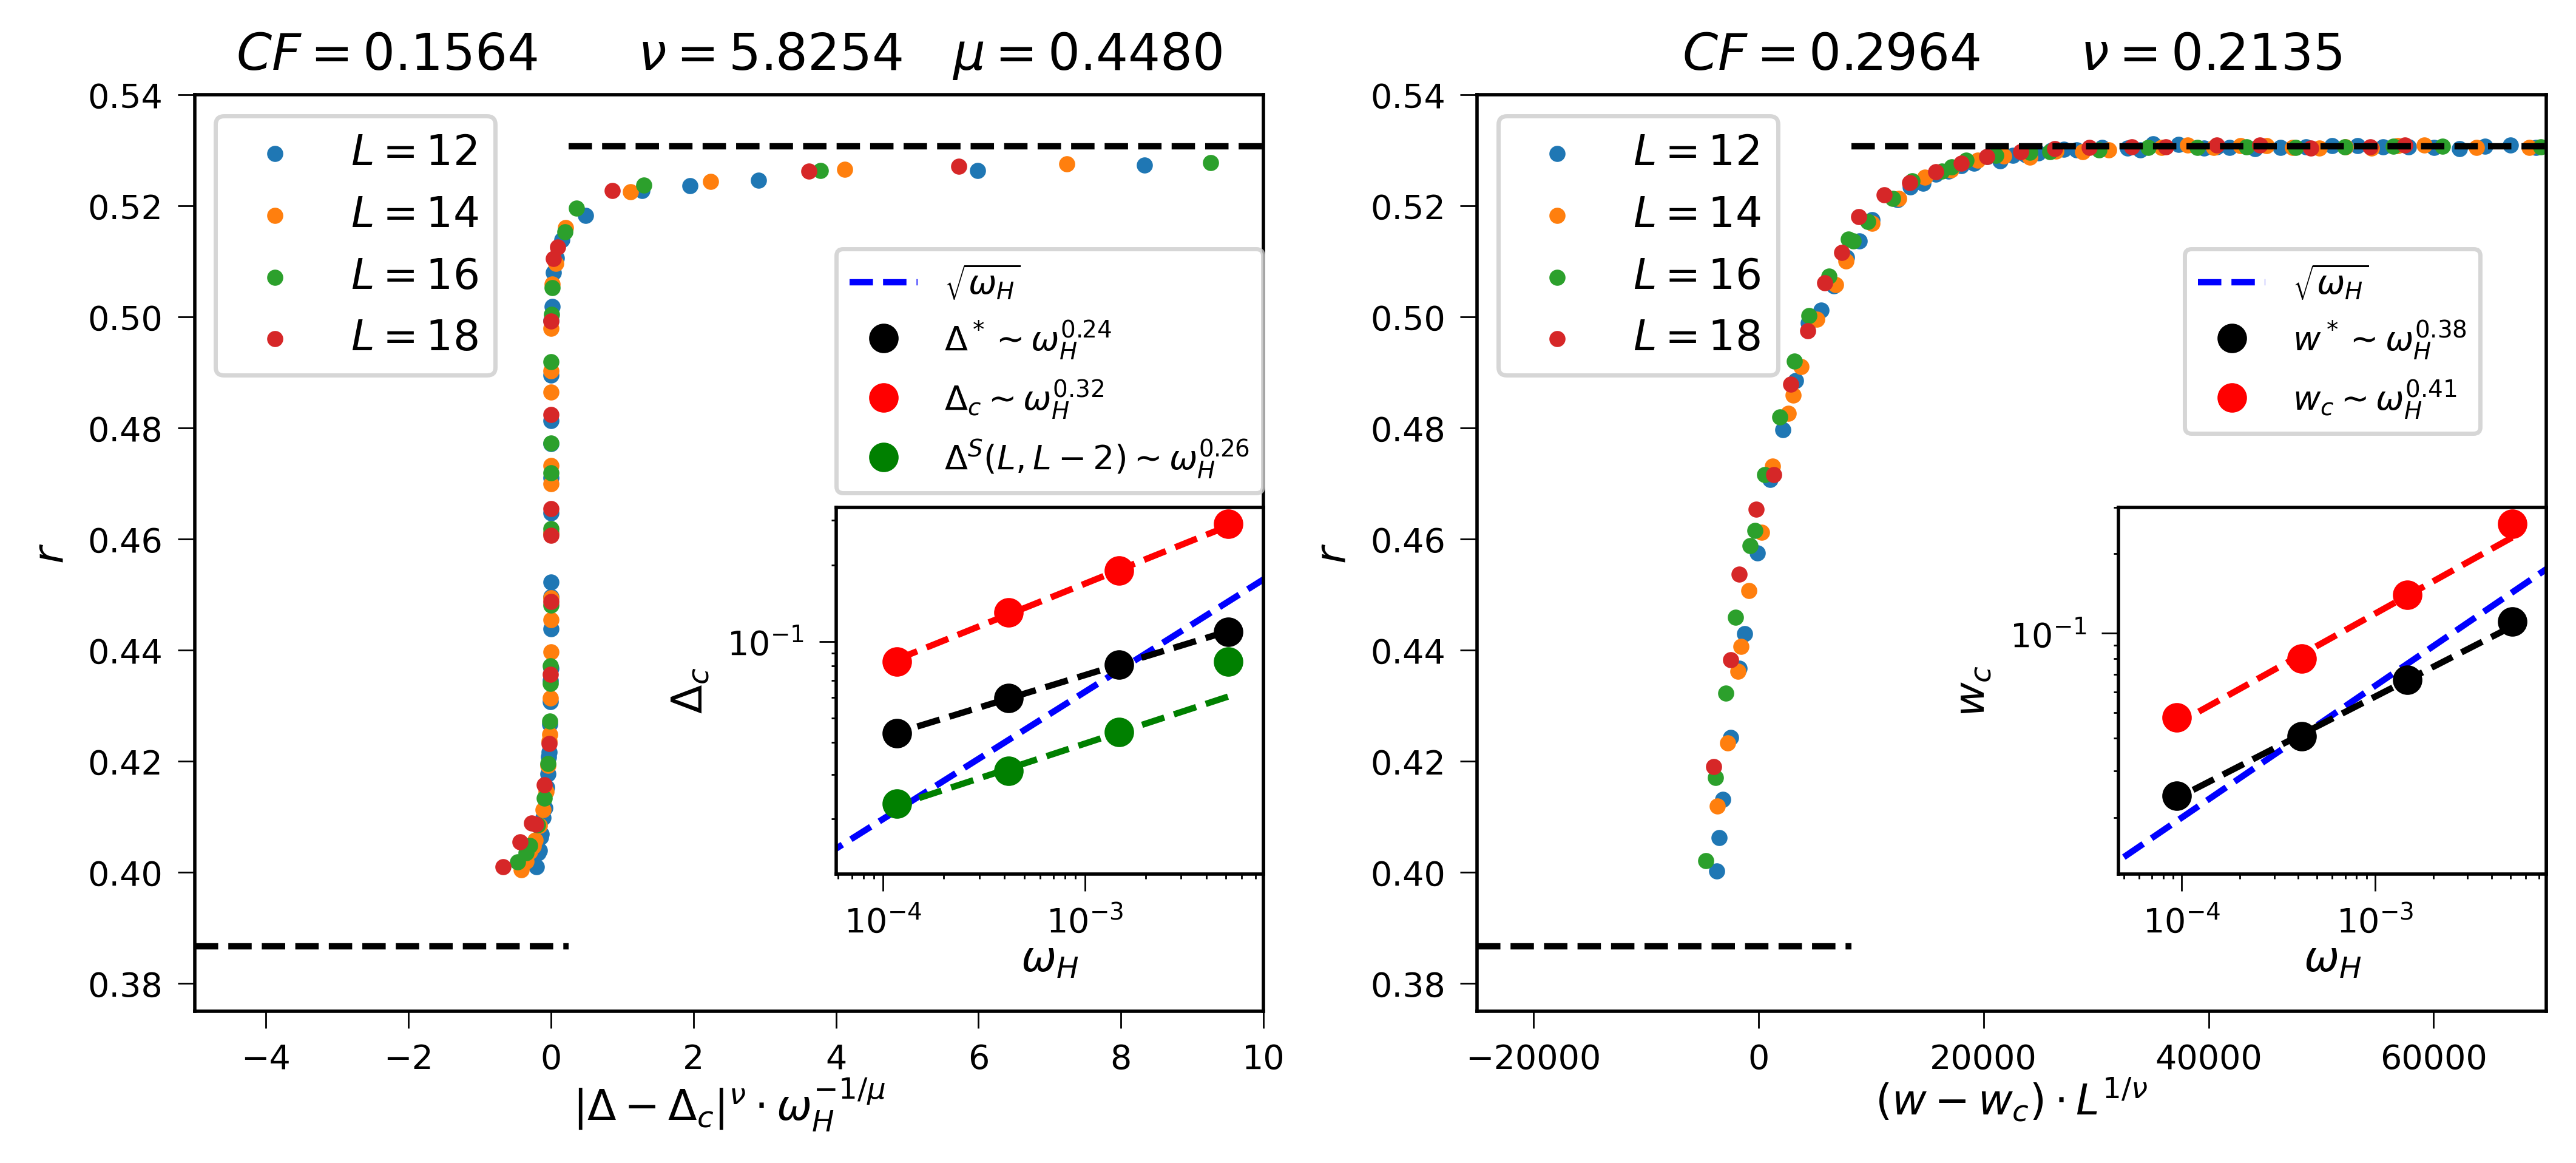

In [127]:
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(10,4), dpi = 500)

plot_collapsed_data(axis=ax1, vs = 'g', crit_fun='free', scaling_ansatz='spacing')
ax1.set_xlim(-5, 10)
ax1.legend(loc='upper left')
plot_collapsed_data(axis=ax2, vs = 'w', crit_fun='free', scaling_ansatz='classic')
ax2.set_xlim(-25000, 70000)
ax2.legend(loc='upper left')
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig7.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig7.png")

### ENTROPY

[0.01734572 0.00512281 0.00147442 0.00041837] [0.10072041 0.07487243 0.05608366 0.04124953]
[0.01734572 0.00512281 0.00147442 0.00041837] [0.083, 0.044, 0.031, 0.023]
[0.01730195 0.00509637 0.00146929 0.00041718] [0.11097903 0.06673236 0.04071274 0.02424218]


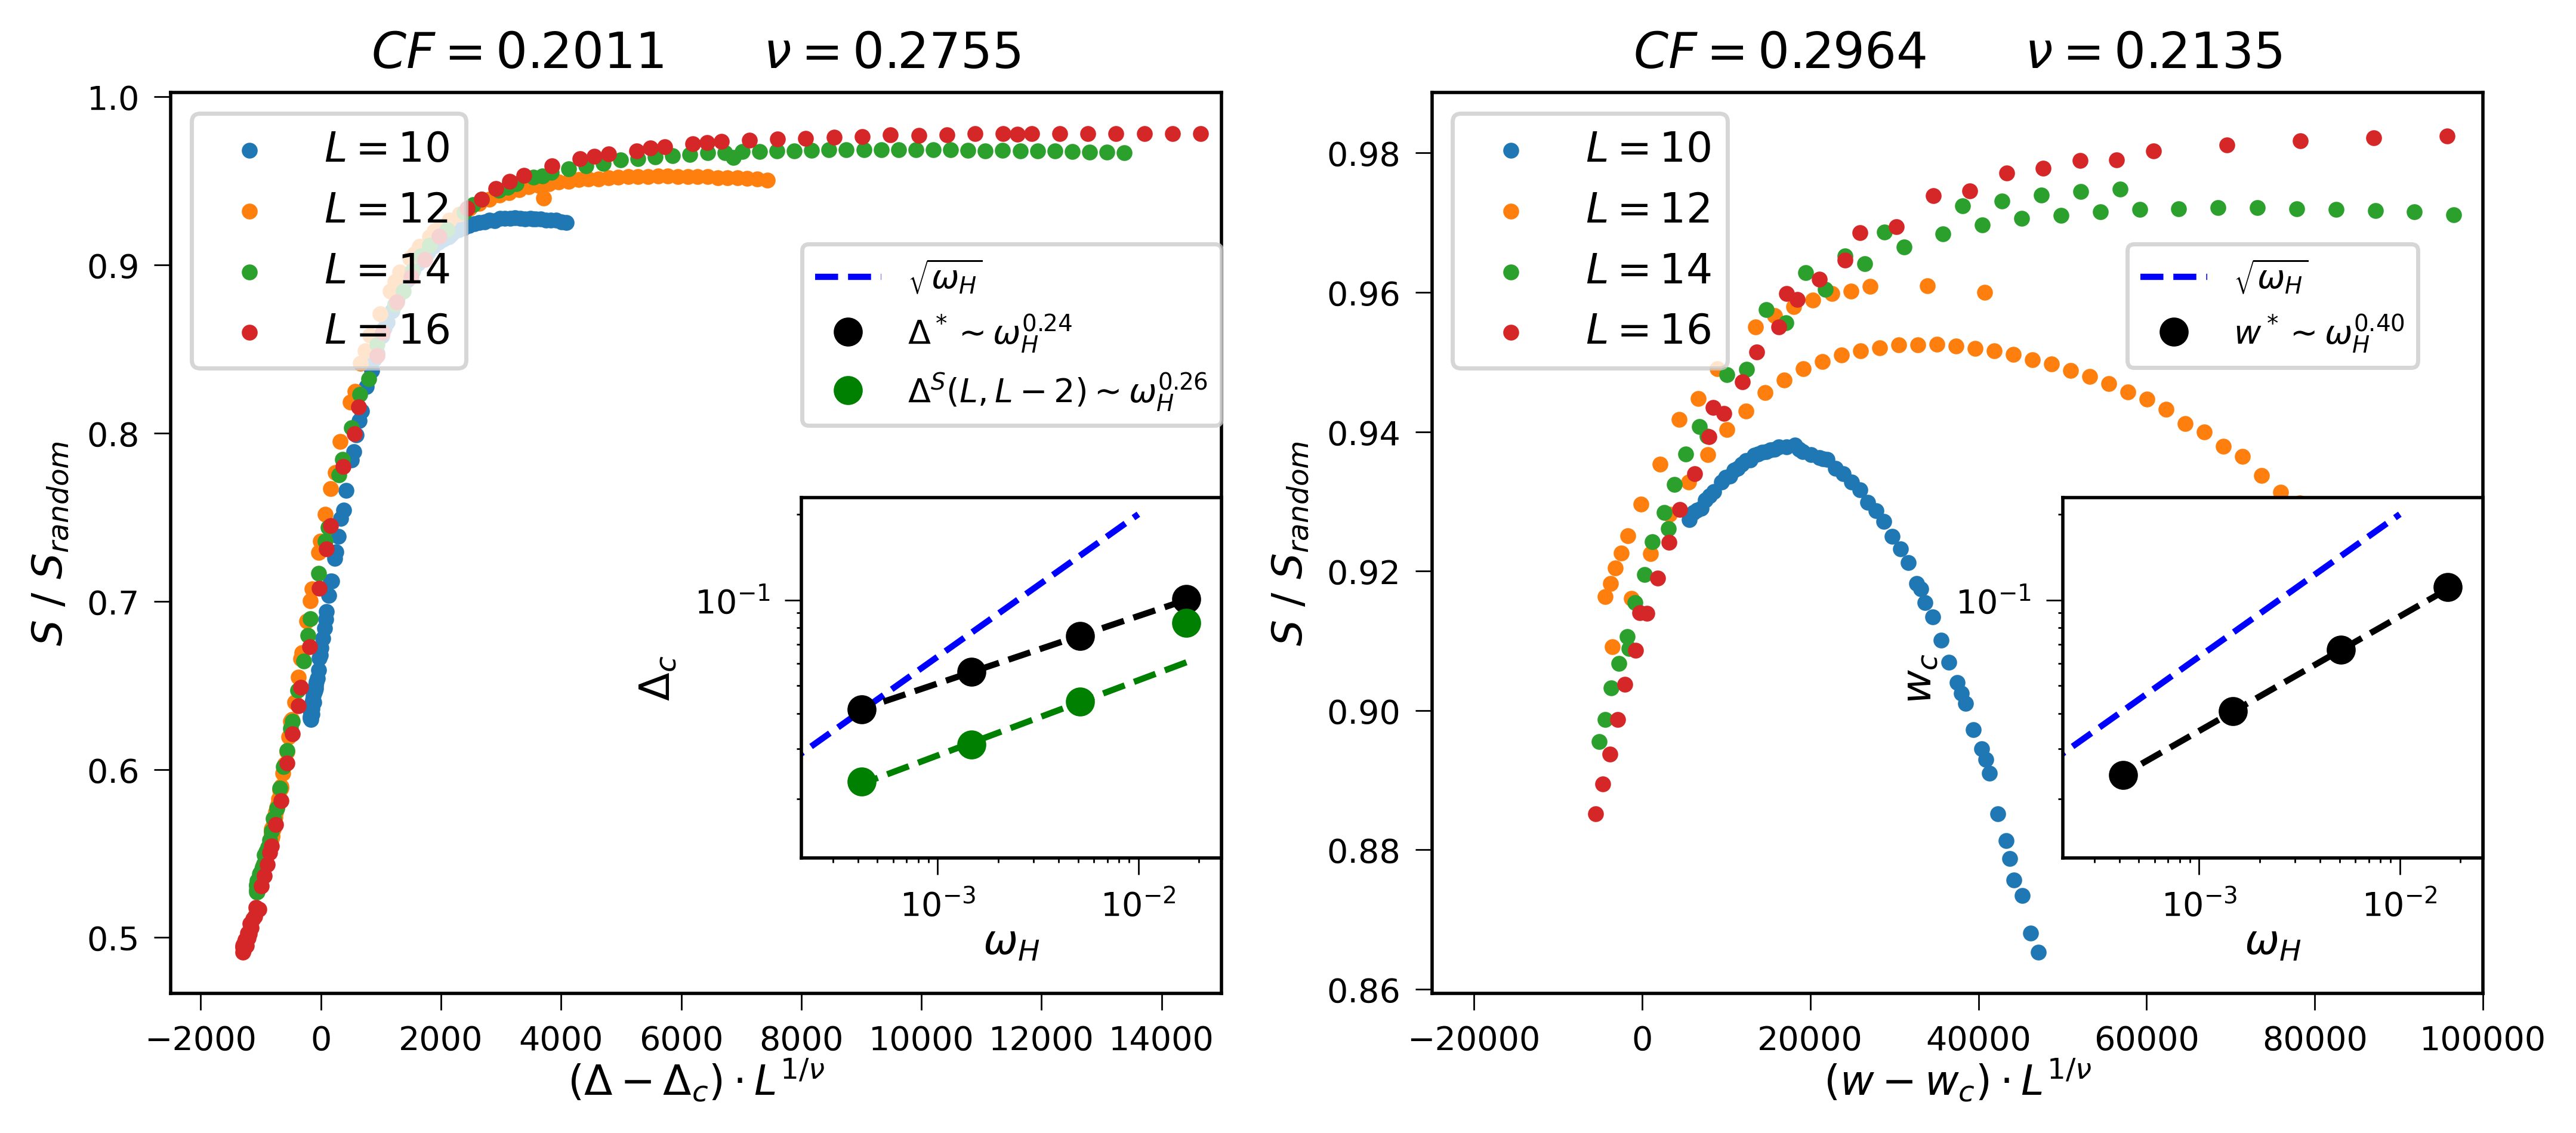

In [129]:
reload_modules()
def get_entropy(settings = None, normalize = True):
    """
    Find entropy values for different system sizes
    """
    if settings is None: settings = user_settings
    vals = range(10, 19, 2)
    if settings['scaling_idx'] == 0: vals = range(10, 19, 2)
    else: vals = hfun.get_scaling_array(settings=settings, x0=0.3, xend=1.0, dx=0.2)
    entropy = []
    xarray = []
    param_copy = copy.deepcopy(cf.params_arr)
    index = []
    wH = []
    for i in range(len(vals)):
        x = vals[i]
        cf.params_arr[settings['scaling_idx']] = x
        filename = cf.base_directory + "STATISTICS" + os.sep + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat" 
        if os.path.exists(filename):
            #stats = pd.read_table(filename, sep="\t", header=None)
            #stats = np.loadtxt(filename, unpack=True, delimiter='\t', skiprows=1)
            stats = hfun.read_python_saved_dat_file(filename)
            
            r_tmp = stats[1]
            

            S = np.array([stats[4][i] for i, r in enumerate(r_tmp) if r > 0.38])
            indices_nan = np.argwhere(np.isnan(S))
            S = np.delete(S, indices_nan)
            xgood = np.array([stats[0][i] for i, r in enumerate(r_tmp) if r > 0.38])
            wH.append(np.array([stats[5][i] for i, r in enumerate(r_tmp) if r > 0.38]))
            xarray.append(np.delete(xgood, indices_nan))
            
            # norm from paper PRE100, 062134: L.Vidmar, M.Rigol
            L = x if settings['scaling_idx'] == 0 else (np.array(xarray) if settings['vs_idx'] == 0  else cf.L)
            norm = L * np.log(2) / 2. + (0.5 - np.log(2)) / 2. - 0.5 
            entropy.append(S / norm if normalize else S)
        else:
            index.append(i)
    #--- restore params array
    cf.params_arr = param_copy
    sizes = np.delete(vals, index)
    return sizes, xarray, entropy, wH

def plot_entropy(axis, vs = 'g', crit_fun = 'free', scaling_ansatz = 'RG'):
    """
    Find entropy values for different system sizes
    """
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')

    sizes, xarray, entropy, wH = get_entropy(settings = settings)
    plot_collapsed_data(axis=axis, vs = vs, crit_fun=crit_fun, scaling_ansatz=scaling_ansatz, x=xarray, y=entropy, sizes=sizes, wH=wH)
    axis.set_ylabel(r"$S\ /\ S_{random}$")
    #axis.set_ylim(0.5,1)
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(10,4), dpi = 500)

plot_entropy(axis=ax1, vs='g', scaling_ansatz='classic');   
ax1.set_xlim(-2500, 15000)
ax1.legend(loc='upper left')
plot_entropy(axis=ax2, vs='w', scaling_ansatz='classic')
ax2.set_xlim(-25000, 100000)
ax2.legend(loc='upper left')

plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig8.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig8.png")

### other ansatz for entropy

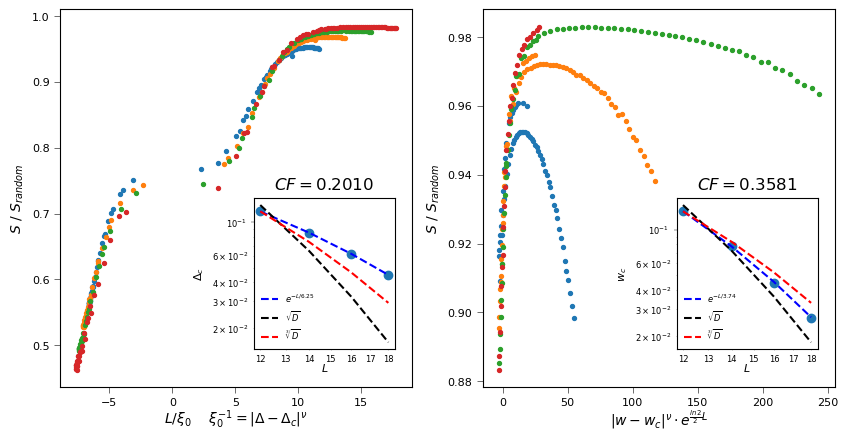

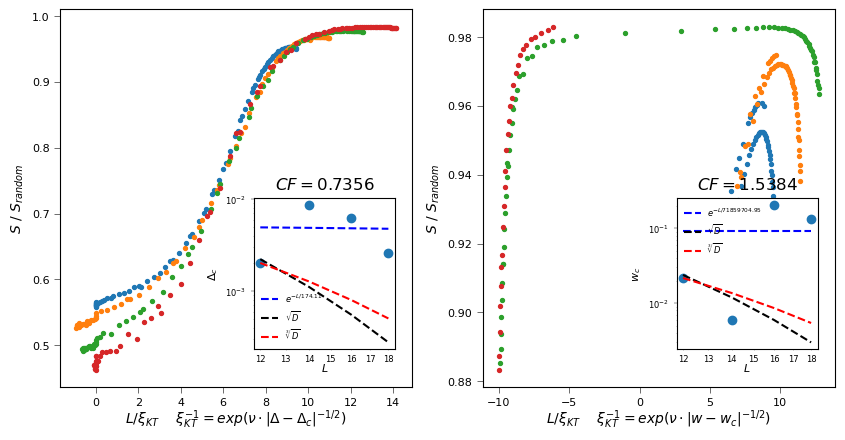

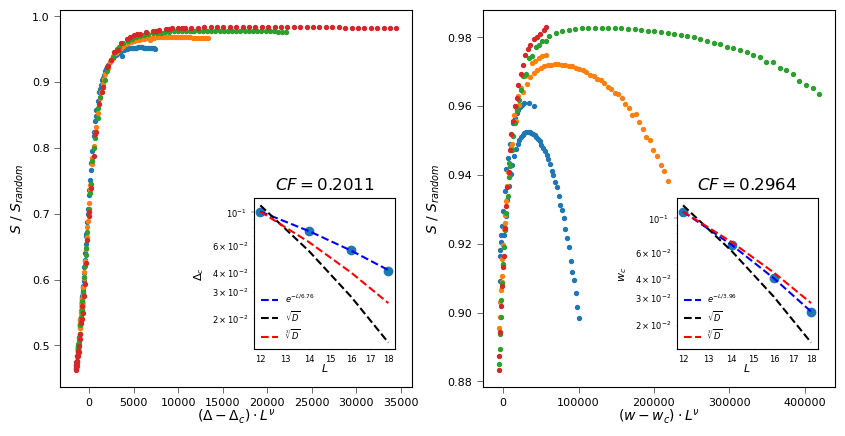

In [ ]:

fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 100)

plot_entropy(axis=ax1, vs='g', scaling_ansatz='RG');
plot_entropy(axis=ax2, vs='w', scaling_ansatz='FGR')


fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(10, 5), dpi = 100)

plot_entropy(axis=ax1, vs='g', scaling_ansatz='KT');
plot_entropy(axis=ax2, vs='w', scaling_ansatz='KT')


fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(10, 5), dpi = 100)

plot_entropy(axis=ax1, vs='g', scaling_ansatz='classic');
plot_entropy(axis=ax2, vs='w', scaling_ansatz='classic')

# APPENDIX

## LOCALISATION LENGTH

In [ ]:
def regspace(x0, xend, dx):
    return np.array(range(int(100 * x0), int(100 * xend), int(100 * dx))) / 100.

cdict = {'red':   ((0.0,  0.22, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.89, 1.0)),

         'green': ((0.0,  0.49, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  0.12, 1.0)),

         'blue':  ((0.0,  0.72, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  0.11, 1.0))}

cmap = matplotlib.colors.LinearSegmentedColormap('custom', cdict)

[0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1]


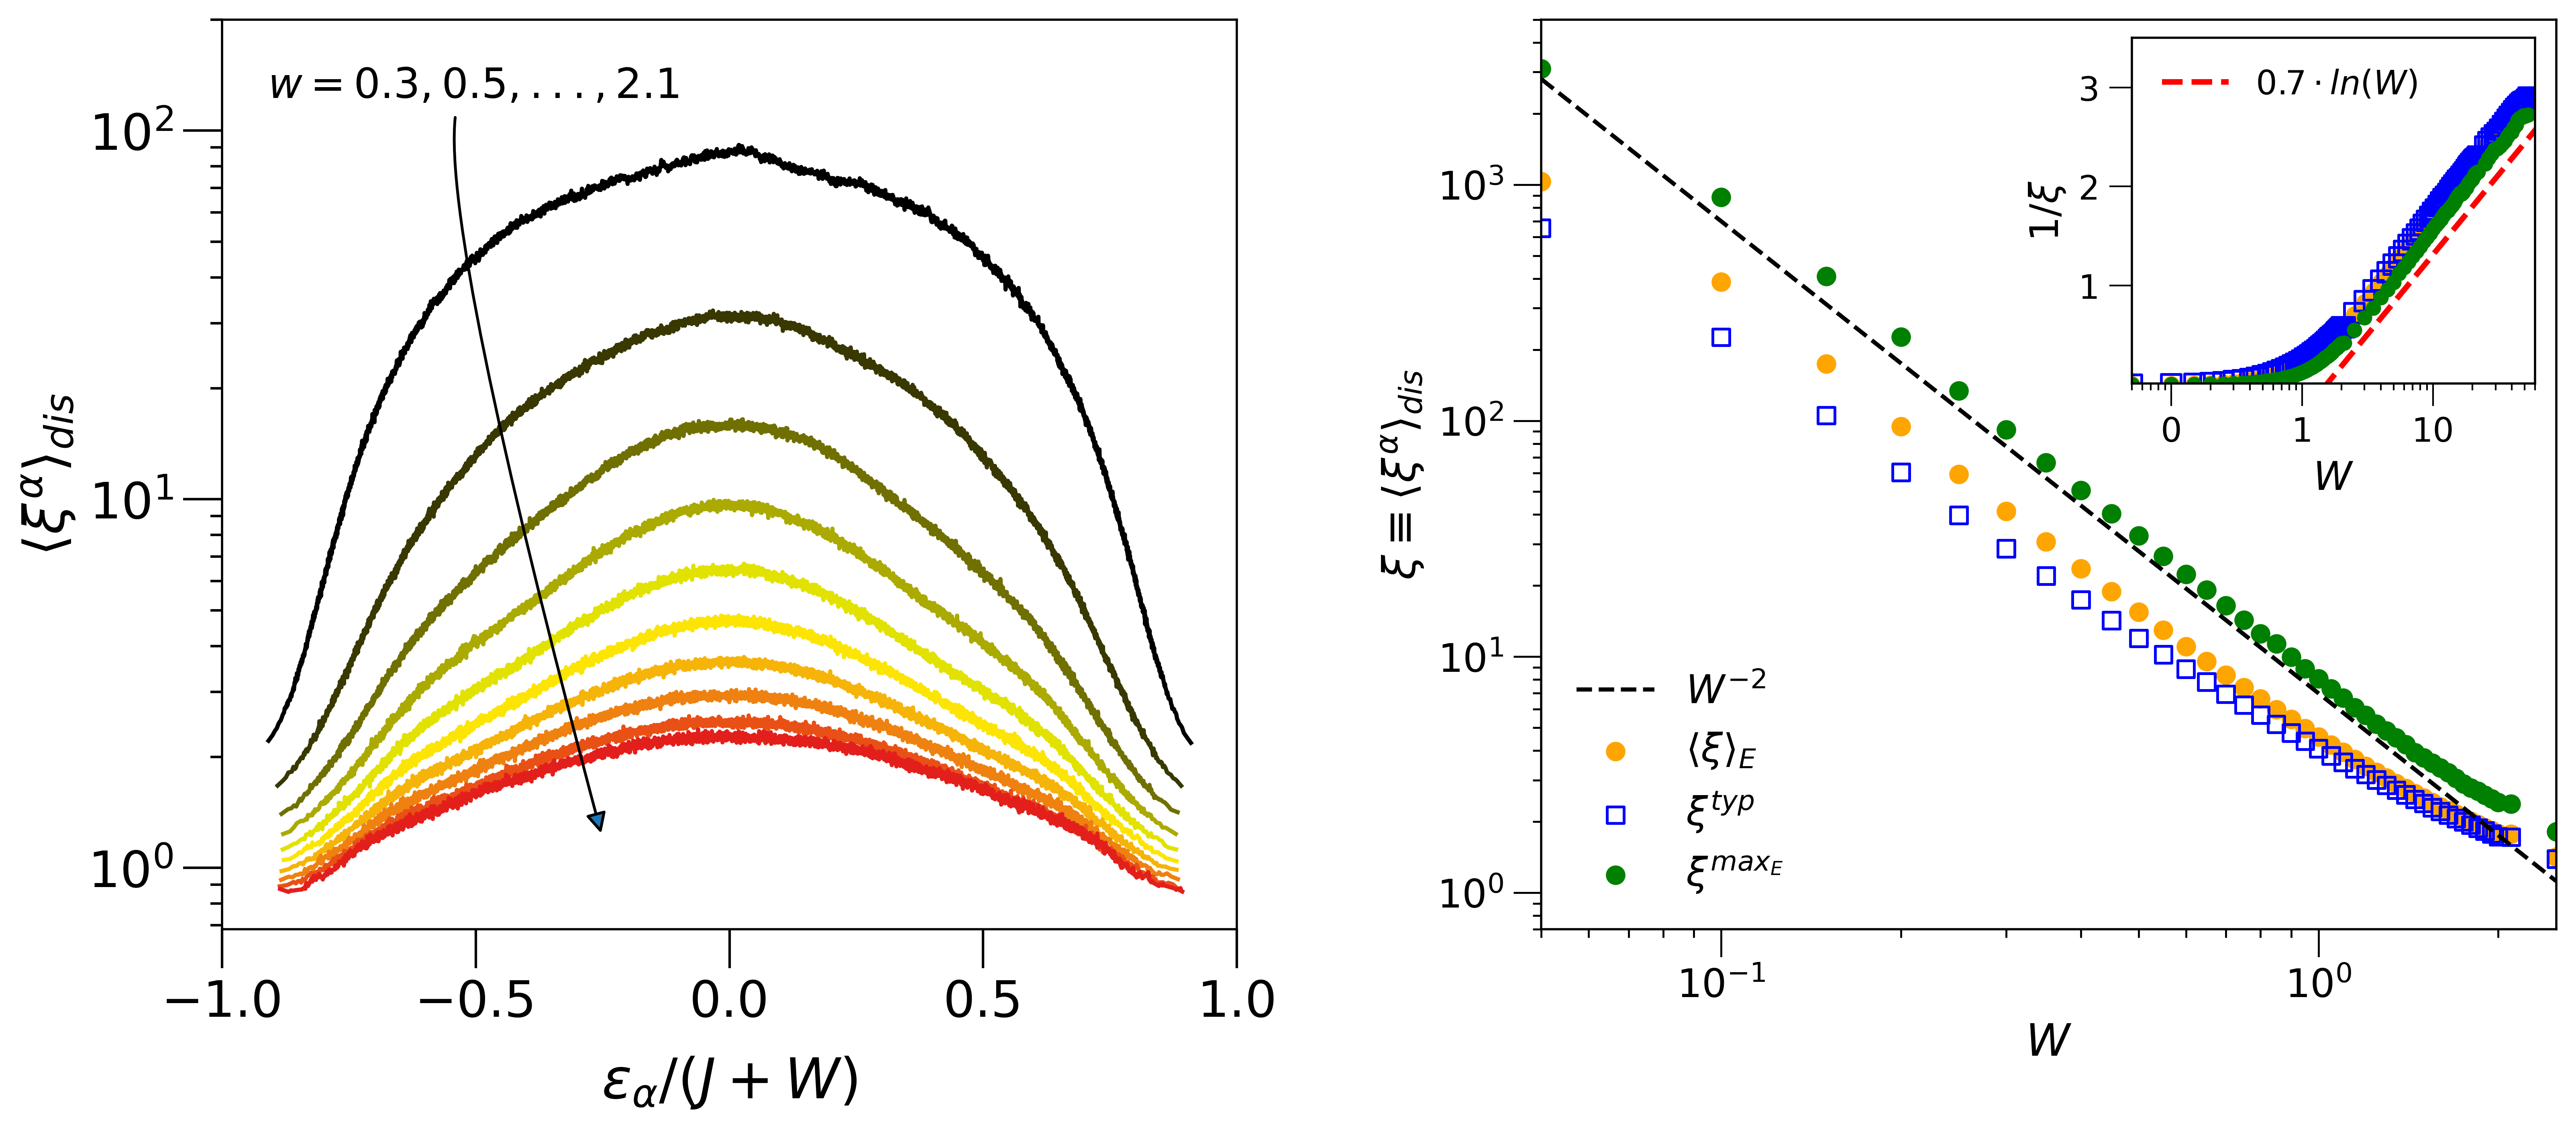

In [ ]:

dis = regspace(0.3, 2.3, 0.20)
print(dis)
L=4000


#---------------------------------------------------------------------- LEFT PANEL
plot_distribution_of_xi = 0
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(15,6), dpi = 500)
i=0
for w in dis:
    loc_len = []
    try:
        loc_len = anderson.load_loc(L, w)
    except OSError:
        a=1
    if len(loc_len) > 0:
        if plot_distribution_of_xi: 
            hist, bins = np.histogram(np.array(loc_len[1]) / np.mean(np.array(loc_len[1])), bins=50)
            p = ax1.plot(bins[0:-1], hist, marker='o', color=cmap( (w-min(dis)) / (max(dis)-min(dis))) , label=r"$w=%.2f$"%(4*w))
        else: p = ax1.plot(loc_len[0], loc_len[1], color=cmap( (w-min(dis)) / (max(dis)-min(dis))) , label=r"$w=%.2f$"%(4*w))
        
        #ax.plot(loc_len[0], 12.0 / (w**2) * ( 1 - ( (1+w)*loc_len[0] )**2), color=p[0].get_color(), linestyle ='--', label="theoretical pred")
#ax1.axhline(y=18, linestyle='--', color='black', label='L=18')
#ax1.axhline(y=12, linestyle='--', color='red', label='L=16')
xlab = "\\xi_{loc} / \\langle\\xi_{loc}\\rangle_{E}" if plot_distribution_of_xi else "\\epsilon_{\\alpha}/(J+W)"
ylab = "p(\\xi_{loc}/\\langle\\xi_{loc}\\rangle_{E})" if plot_distribution_of_xi else "\\langle\\xi^{\\alpha}\\rangle_{dis}"
hfun.set_plot_elements(axis=ax1, xlim = (-1, 1), 
                                    ylim = (None, None), ylabel=ylab, xlabel=xlab, set_legend=False, font_size=18)
#ax1.grid()
if plot_distribution_of_xi: ax1.set_yscale('linear')
else: ax1.set_yscale('log')
ax1.set_xscale('linear');   
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 2e2)
#dis = 4 * dis
dw = (max(dis) - min(dis)) / (dis.size-1)
ax1.annotate(r"$w=%.1f,%.1f,...,%.1f$"%(min(dis), min(dis)+dw, max(dis)), xy=(-0.25, 1.2),
            xytext=(-0.1, 150), 
            va='top', 
            ha='right',
            arrowprops={'arrowstyle': '-|>', 'connectionstyle': 'angle3,angleA=0,angleB=105'}, fontsize=15)



#---------------------------------------------------------------------- RIGHT PANEL
def plot_loc_len(ax, dis, inset = False, percentile: int = 90):
    xi_mean = []
    xi_typ = []
    xi_perc = []
    xi_max = []

    pick_middle_spec = 0
    invert=inset
    num = 500

    for w in dis:
        status=True
        try:
            data = anderson.load_loc(L=L, w=w)
            loc_len = data[1]
            if pick_middle_spec: 
                idx = min(range(len(data[0])), key=lambda i: abs(data[0][i] - 0.0));
                loc_len = loc_len[idx - int(num / 2) : idx + int(num / 2)]
        except OSError:
            #print("File not found for %.2f"%w)
            status=False
        if status:
            xi_mean.append(np.mean(loc_len))
            xi_perc.append(np.percentile(loc_len, percentile))
            xi_tmp = 0
            xi_max.append(max(loc_len))
            for xi in loc_len:
                xi_tmp = xi_tmp + np.log(xi)
            xi_typ.append(np.exp(xi_tmp / np.float(len(loc_len))))
        else:
            dis = np.array(dis[dis != w])
        #    xi_mean.append(np.nan)
        #    xi_perc.append(np.nan)
        #    xi_typ.append(np.nan)
        #    xi_max.append(np.nan)
    xi_mean = np.array(xi_mean)
    xi_typ = np.array(xi_typ)
    xi_perc = np.array(xi_perc)
    xi_max = np.array(xi_max)
    expon = -1 if invert else 1

    ##PLOT
    #dis = 4 * dis
    #if inset:   dis = np.log10(dis)
    if True:
        if inset:
            ax.scatter(dis, (xi_mean)**(expon), marker='o', s=25, facecolor='orange', edgecolor='orange')
            ax.scatter(dis, (xi_typ)**(expon), marker='s', s=50 , facecolor='None', edgecolor='blue')
            ax.scatter(dis, (xi_max)**(expon), marker='o', s=20 , facecolor='green', edgecolor='green')
            #ax.plot(dis, (xi_perc)**(expon), marker='o')
        else:
            ax.scatter(dis, (xi_mean)**(expon), marker='o', facecolor='orange', edgecolor='orange',  label=r"$\langle\xi\rangle_E$")
            ax.scatter(dis, (xi_typ)**(expon), marker='s', facecolor='None', edgecolor='blue', label=r"$\xi^{typ}$")
            ax.scatter(dis, (xi_max)**(expon), marker='o', facecolor='green', edgecolor='green', label=r"$\xi^{max_E}$")
            #ax.plot(dis, (xi_perc)**(expon), marker='o', label=r"$\xi_{%d}$"%percentile)
        
        par = 0.7
        pars = [0,0]
        if False and inset:
            lenn = len(dis)
            pars, pcov = fit(f=power_law, 
                                xdata=dis[lenn-30:-1], 
                                ydata=xi_typ[lenn-30:-1])
        x = np.logspace(-3, 3, 100)
        if inset:   
            ax.plot(x, 0.7 * np.log(x)**(-expon) - 0.3, linewidth=2, linestyle='--', color='red', label=(r"$0.7\cdot ln(W)$" if invert else r"$ln^{-1}(W)$"))
            #ax.plot(x, (1.5 * ((x)))**(expon), linestyle='--', color='red', label=(r"$0.7\cdot ln(W)$" if invert else r"$0.7\cdot ln^{-1}(W)$"))
        else:       ax.plot(dis, (7 / dis**2)**(expon), linestyle='--', color='black', label=r"$W^{%d}$"%(2 if invert else -2))

    ylab = "1\\ / \\ \\xi" if invert else "\\xi\\equiv\\langle\\xi^{\\alpha}\\rangle_{dis}"
    ylimits = ( (1e-2, 4e0) if invert else (1e-3, 1e4) ) if pick_middle_spec else ( (1e-2, 4e0) if invert else (1e-2, 1e3))
    hfun.set_plot_elements(axis=ax, xlim = (min(dis), max(dis)), 
                                        ylim = ylimits, ylabel=ylab, xlabel="W", set_legend=False, font_size=14)
    #ax.grid()
    if invert: ax.set_yscale('linear')
    #ax.set_xscale('linear')
    

dis = regspace(0.05, 2.7, 0.05)
percentile=75

plot_loc_len(ax=ax2, dis=dis, percentile=percentile)
ax2.set_ylim(7e-1,5e3)

ax2.legend(frameon=False
                , loc='lower left'
                , fontsize=14)
left, bottom, width, height = [0.6, 0.6, 0.38, 0.38]

axis_inset = hfun.add_subplot_axes(ax2, [left, bottom, width, height])

dis = regspace(0.0, 55, 0.05)
plot_loc_len(ax=axis_inset, dis=dis, inset=True, percentile=percentile)
hfun.set_plot_elements(axis=axis_inset, xlim = (min(dis), max(dis)), 
                                        ylim = (None, None), ylabel="1 / \\xi", xlabel="W", set_legend=True, font_size=12)
axis_inset.set_ylim(0, 3.5e0)
axis_inset.set_xlim(0.0, 60.0)
axis_inset.set_xscale('log')
axis_inset.set_yscale('linear')
axis_inset.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%(x) if x > 100 == 0 else ""))
axis_inset.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%(x)))
#axis_inset.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: ("%d"%(x) if x >= 1 else ("%.1f"%(x) if x == 0.5 else ""))))
#axis_inset.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%(x)))

fig.subplots_adjust(wspace=0.3, hspace=0.3)
# inset as function of log w 
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA1.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA1.png")

## THOULESS TIME -- 3D ANDERSON

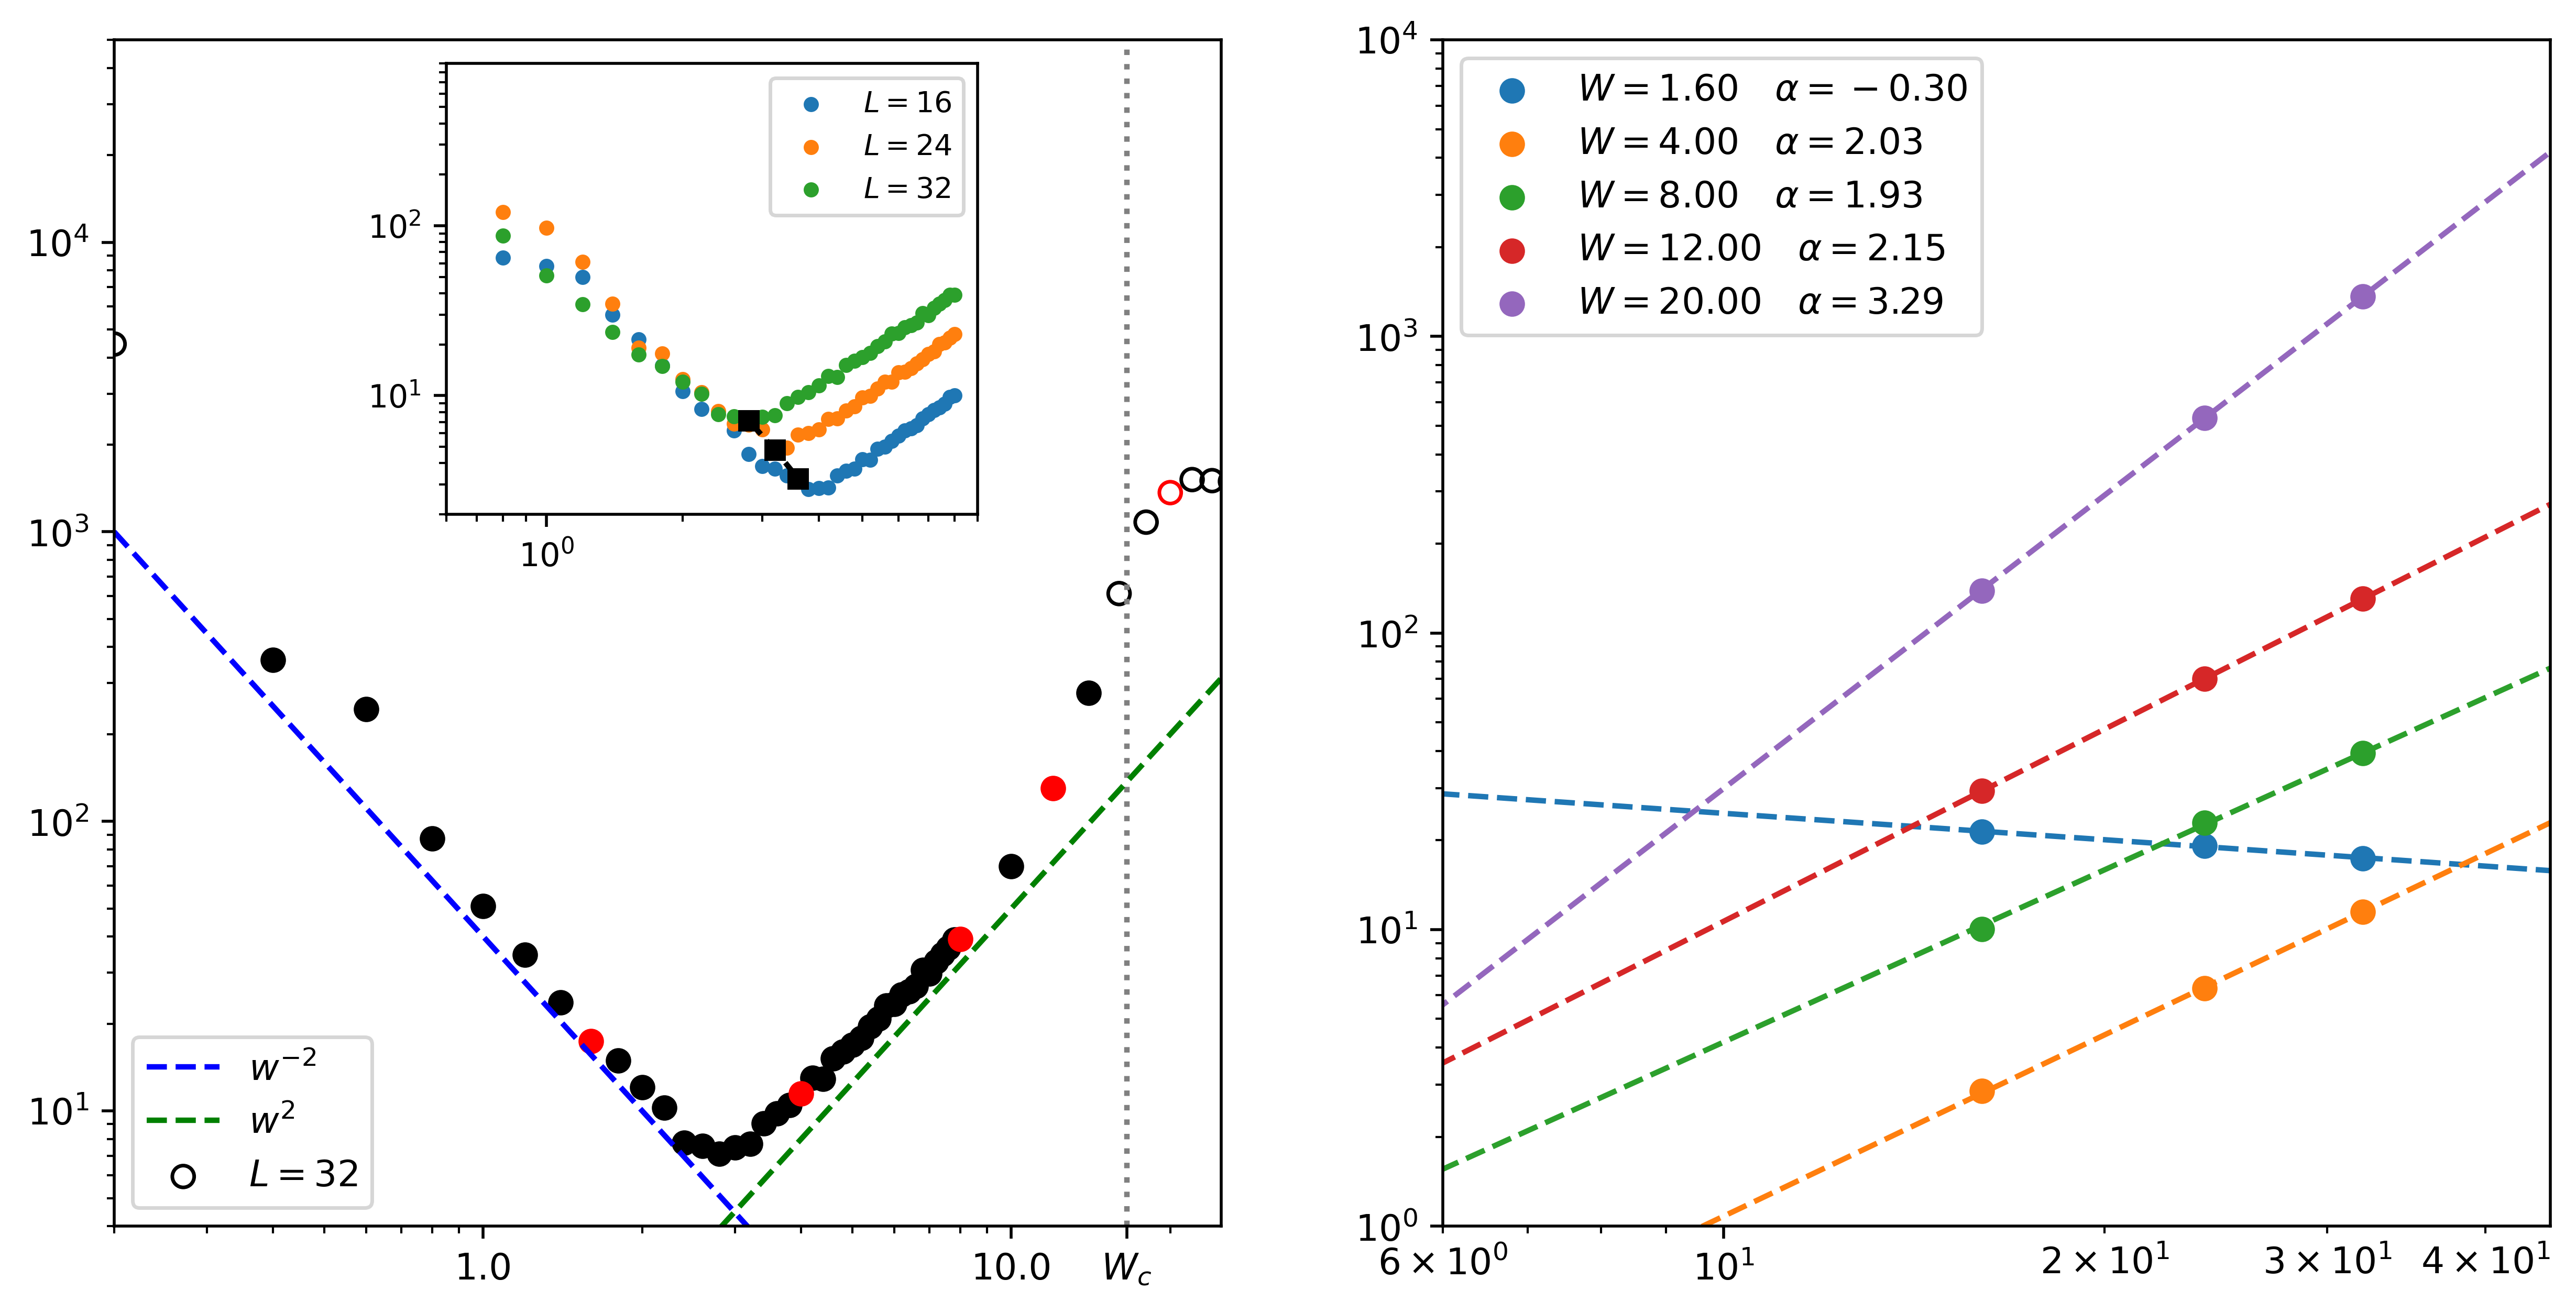

In [ ]:
from matplotlib.pyplot import xticks


reload_modules()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi = 500)

W0=0.05
Wend = 20.0
dW = 0.05

func_x = lambda x, a: x #* a**2
vals = []

for x in range(0, int((Wend-W0) / dW) + 1) :
    vals.append(W0 + x * dW)
vals = np.array(vals)
rescaled_W = 4.0 * vals

Wvalues = [0.4, 1.0, 2.0, 3.0, 5.0]
eps = 1.2e-1
def plot_curve(axis, sizes = [32], inset = False):
    minima = []
    W_min = []
    rescaled_W = 4.0 * vals
    for L in sizes:
        cf.set_params(_L=L)
        importlib.reload(cf)
        tH = []
        thouless_time = []
        timee = []
        fc = []
        for x in vals:
            status, times, sff, tH_tmp, tau, r = anderson.load_sff(L=L, W = x)
            if status:
                sff_dev = np.abs(np.log10(sff / hfun.sff_GOE(times)))


                idx = min(range(len(sff_dev)), key=lambda i: abs(sff_dev[i] - eps));
                if idx > 0: tau = times[idx]# * tH_tmp / np.exp(0.5*L)
                else: tau = nan

                tH_tmp = 0
                status2, gap_ratio, dist_r, wH_typ_unfolded_tmp, wH_tmp, wH_typ_tmp = anderson.load_level_spacing_dist(L=L, W=x, log_data=False, use_500_states=False)
                if status2: tH_tmp = 1. / wH_tmp
                thouless_time.append(tau * tH_tmp)
                tH.append(tH_tmp)
                
                if abs(r-0.5306) < 0.007:
                    fc.append('black')
                else:
                    fc.append('None')
            else:
                thouless_time.append(np.nan)
                tH.append(np.nan)
                fc.append('None')
        thouless_time = np.array(thouless_time)
        th_min = np.nanmin(thouless_time[thouless_time > 3e0])       
        idx = np.array(np.where(thouless_time == th_min))[0][0]
        minima.append(thouless_time[idx])
        
        W_min.append(rescaled_W[idx])

        if inset:
            axis.scatter(rescaled_W, thouless_time, label=r"$L=%d$"%L, marker='o', s=10)
        else:
            for i in range(len(vals)):
                if vals[i] not in Wvalues:
                    if i == 0:  axis.scatter(rescaled_W[i], thouless_time[i], facecolor=fc[i], edgecolor = 'black', label=r"$L=%d$"%L, marker='o')
                    else:       axis.scatter(rescaled_W[i], thouless_time[i], facecolor=fc[i], edgecolor = 'black')

            for W in Wvalues:
                idx = min(range(len(vals)), key=lambda i: abs(vals[i] - W));
                axis.scatter(4 * W, thouless_time[idx], marker='o', edgecolors='red', facecolor=('red' if fc[idx] == 'black' else 'None'))
    if inset:
        W_min = np.array(W_min)
        minima = np.array(minima)
        axis.plot(W_min, minima, linestyle='--', color='black', marker='s', markersize=5)
    axis.set_yscale('log')
    axis.set_xscale('log')
    if inset:
        axis.set_ylim(2e0, 9e2)
        axis.set_xlim(6e-1, 9)
        axis.legend(fontsize=8)
    else:
        ax1.set_xticks(list(ax1.get_xticks()) + [16.54]);   xtik = ax1.get_xticks();
        tick_labels = ax1.get_xticks().tolist()
        tick_labels = [tick_labels[i] if xtik[i] != 16.54 else r"$W_c$" for i in range(len(xtik))]
        ax1.set_xticklabels(tick_labels)

        axis.set_ylim(4e0, 5e4)
        axis.set_xlim(2e-1, 25.0)
        axis.axvline(x=16.54, linestyle=':', color='gray')


plot_curve(axis=ax1)
ax1.plot(rescaled_W, 4e1/rescaled_W**2.0, linestyle='--', color='blue', label=r"$w^{-2}$")
ax1.plot(rescaled_W, 5e1*(rescaled_W/10)**2.0, linestyle='--', color='green', label=r"$w^{2}$")
#b=0.75;  ax1.plot(vals, 75 / np.exp(1*b) * np.exp(b*vals), linestyle='--', color='black', label=r"$e^{w}$")

ax1.legend(loc='lower left')

left, bottom, width, height = [0.3, 0.6, 0.48, 0.38]
axis_inset = hfun.add_subplot_axes(ax1, [left, bottom, width, height])
vals = hfun.regspace(0.2, 4.0, 0.05)
plot_curve(axis=axis_inset, sizes=[16, 24, 32], inset=True)

sizes = range(8, 40, 8)

fc = []
def plot_tau_size(axis, W):
    tH = []
    thouless_time = []
    timee = []
    for L in sizes:
        status, times, sff, tH_tmp, tau, r = anderson.load_sff(L=L, W = W)
        if status:
            sff_dev = np.abs(np.log10(sff / hfun.sff_GOE(times)))


            idx = min(range(len(sff_dev)), key=lambda i: abs(sff_dev[i] - eps));
            if idx > 0: tau = times[idx]# * tH_tmp / np.exp(0.5*L)
            else: tau = nan
            tH_tmp = 0
            status2, r, dist_r, wH_typ_unfolded_tmp, wH_tmp, wH_typ_tmp = anderson.load_level_spacing_dist(L=L, W=W, log_data=False, use_500_states=False)
            if status2: tH_tmp = 1. / wH_tmp
            thouless_time.append(tau * tH_tmp)
            tH.append(tH_tmp)
        else:
            thouless_time.append(np.nan)
            tH.append(np.nan)


    pars, pcov = fit(f=power_law, 
                        xdata=sizes[1:], 
                        ydata=thouless_time[1:])
    axis.scatter(sizes, thouless_time, label=r"$W=%.2f\quad\alpha=%.2f$"%(4 * W, pars[0]), marker='o')
    x = np.linspace(1, 100, 100)
    axis.plot(x, power_law(x, *pars), linestyle='--')

for W in Wvalues:
    plot_tau_size(ax2, W)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(6, 45)
ax2.set_ylim(1e0, 1e4)
ax2.legend(loc = 'upper left')

# USE NUMERICAL DATA FROM LEVEL SPACING DIST AND ADD TO PLOT BOTH NUMERICAL (use squares) AND L^3
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA2.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA2.png")

## RAW DATA

In [139]:

def plot_raw_data(axis, settings = None, x = None, y = None, sizes = None, alfa = 0.5):
    if settings is None: settings = user_settings

    use_gap_ratio=False
    if x is None or y is None:
        use_gap_ratio=True
        x = []
        y = []
        sizes = np.array(range(12,19,2))
        for xpar in sizes:
            cf.params_arr[settings['scaling_idx']] = xpar
            filename = cf.base_directory + "STATISTICS" + os.sep + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat" 
            if os.path.exists(filename):
                stats = hfun.read_python_saved_dat_file(filename)
                r_tmp = stats[1]
                x.append([stats[0][i]for i, r in enumerate(r_tmp) if r > 0.0])
                y.append([stats[1][i] for i, r in enumerate(r_tmp) if r > 0.0])
                
        x = np.array(x)
    for i in range(len(sizes)):
        par=sizes[i]
        wH = np.sqrt(par) / binom(par, par / 2)
        axis.plot(x[i], y[i], label=hfun.key_title(par, settings),markersize=4, marker='o')

    lab = hfun.var_name if settings['vs_idx'] == 2 else settings['vs']
    ylalab = "r" if use_gap_ratio else "S / S_{random}"
    hfun.set_plot_elements(axis = axis, ylabel = ylalab, xlabel = lab, settings=settings, 
                            font_size=12, set_legend=False, xlim=(None, None), ylim=(None, None))
    axis.legend(loc='lower right', ncol=1, fontsize=12)
    axis.set_yscale('linear')
    if use_gap_ratio:
        axis.axhline(y=0.5307, xmin=0.35, xmax = 1, ls='--', color='black')
        axis.axhline(y=0.3867, xmin = 0, xmax=0.35, ls='--', color='black')
        axis.set_ylim(0.375, 0.54)


alfa = 0.33
alfa = 0.5


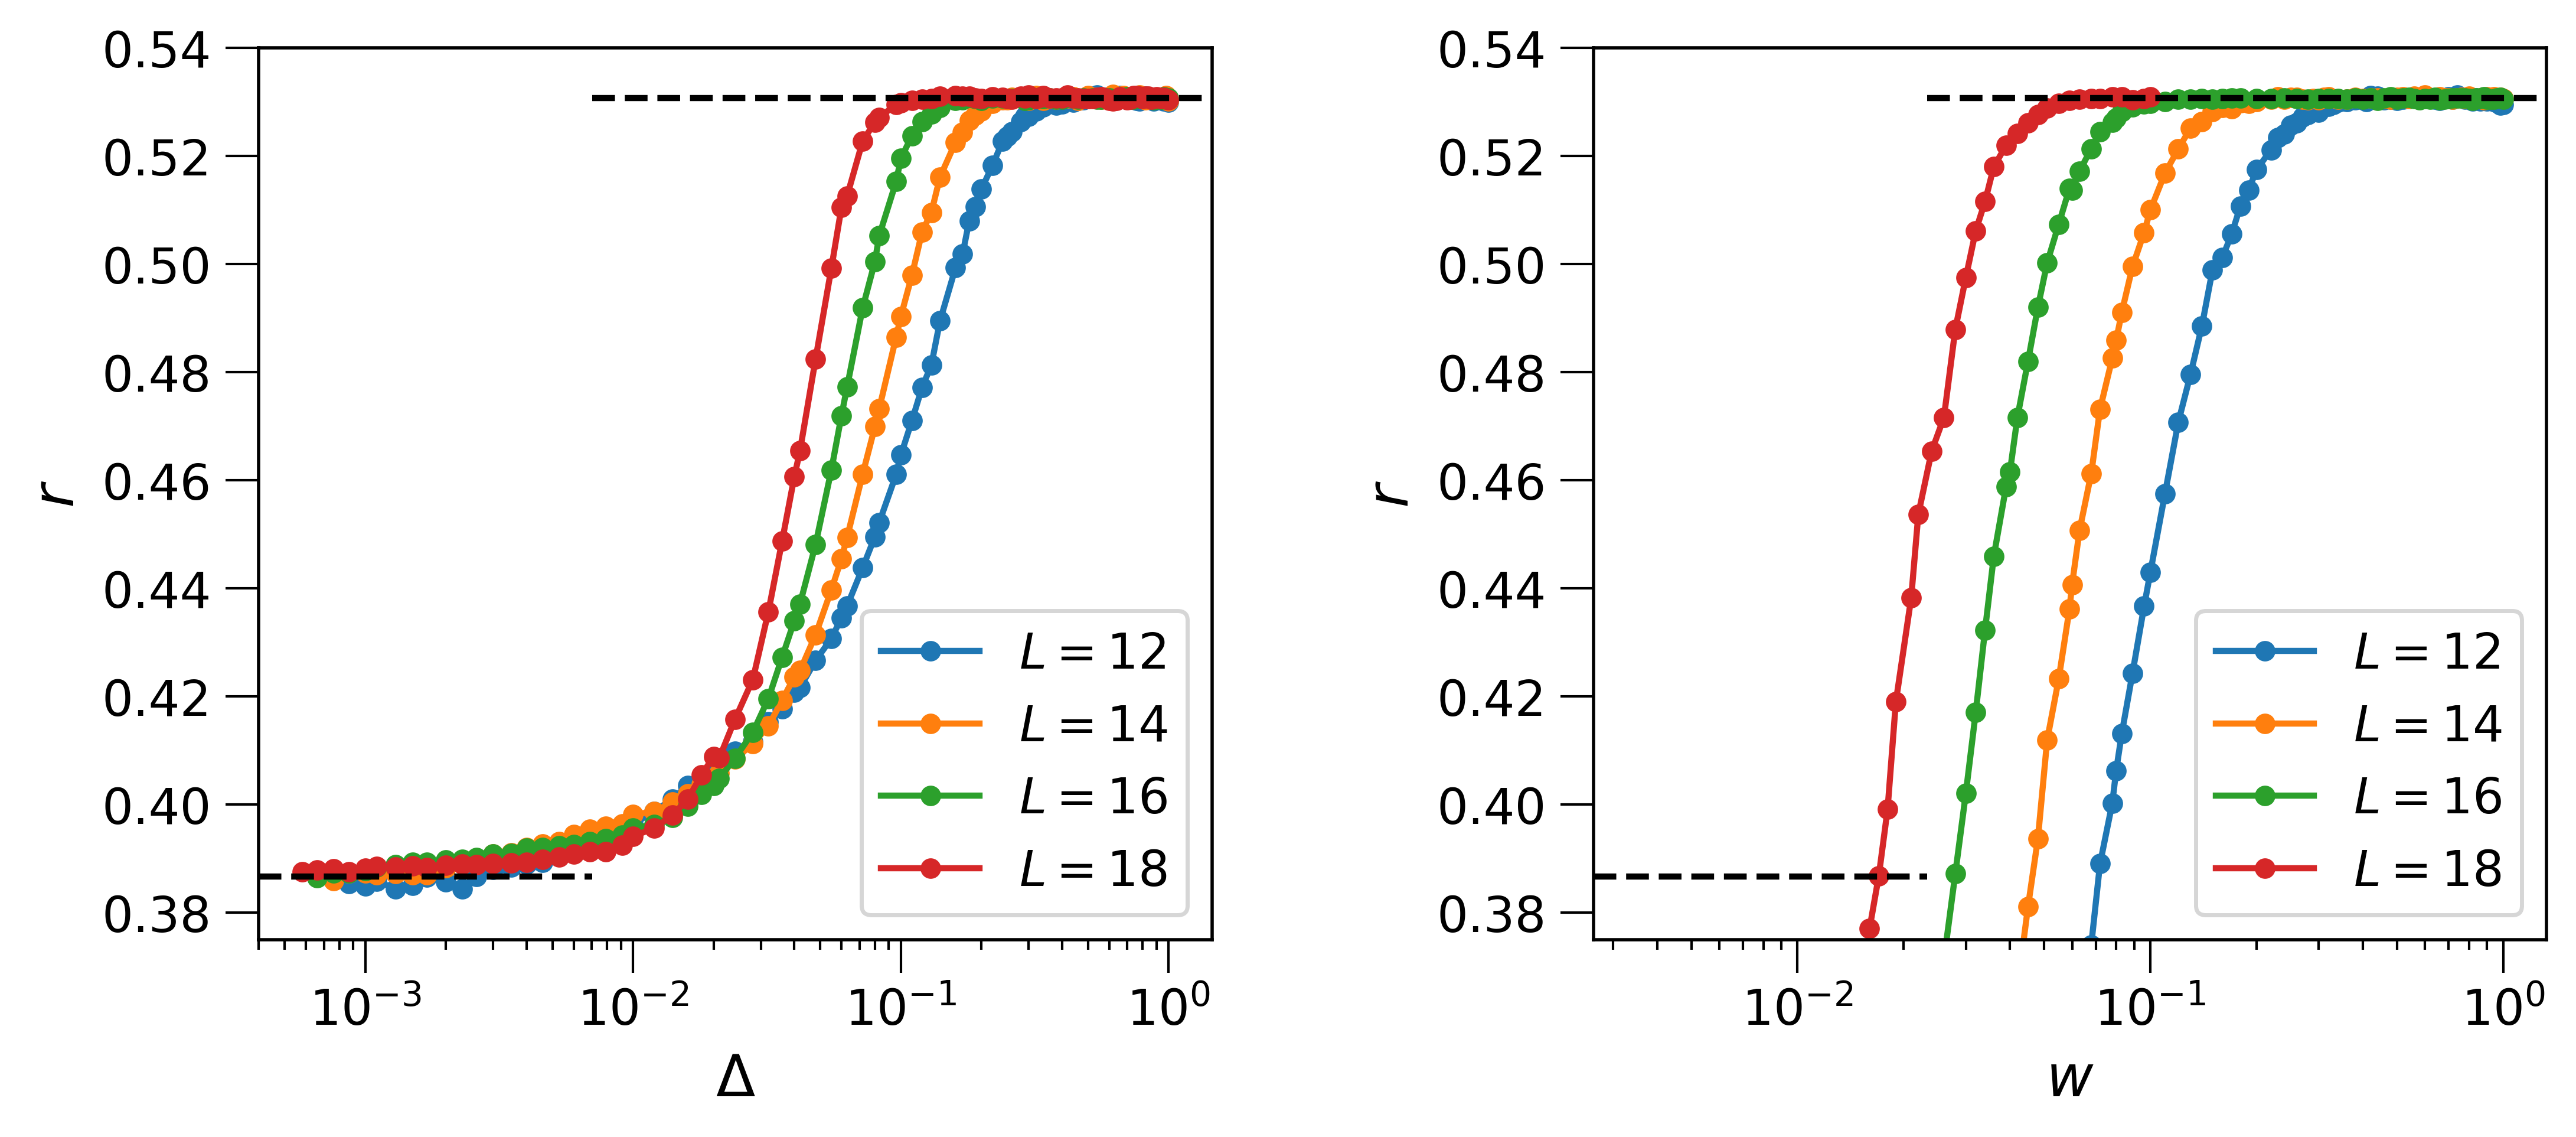

In [140]:
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(10,4), dpi = 500)

set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('g')
settings = getattr(set_class, 'settings')

plot_raw_data(axis=ax1, settings=settings, alfa = 0.0)
print("alfa = 0.33")


set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('w')
settings = getattr(set_class, 'settings')
plot_raw_data(axis=ax2, settings=settings, alfa = 0.0)
print("alfa = 0.5")
fig.subplots_adjust(wspace=0.4, hspace=0.3)

plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA3.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA3.png")

[6.6e-04 7.6e-04 8.7e-04 1.0e-03 1.1e-03 1.3e-03 1.5e-03 1.7e-03 2.0e-03
 2.3e-03 2.6e-03 3.0e-03 3.5e-03 4.0e-03 4.6e-03 5.3e-03 6.0e-03 6.9e-03
 7.9e-03 9.1e-03 1.0e-02 1.2e-02 1.4e-02 1.6e-02 1.8e-02 2.0e-02 2.1e-02
 2.4e-02 2.8e-02 3.2e-02 3.6e-02 4.0e-02 4.2e-02 4.8e-02 5.5e-02 6.0e-02
 6.3e-02 7.2e-02 8.0e-02 8.3e-02 9.6e-02 1.0e-01 1.1e-01 1.2e-01 1.3e-01
 1.4e-01 1.6e-01 1.7e-01 1.8e-01 1.9e-01 2.0e-01 2.2e-01 2.4e-01 2.5e-01
 2.6e-01 2.8e-01 2.9e-01 3.0e-01 3.2e-01 3.3e-01 3.4e-01 3.6e-01 3.8e-01
 4.0e-01 4.2e-01 4.4e-01 4.6e-01 4.8e-01 5.0e-01 5.2e-01 5.4e-01 5.5e-01
 5.6e-01 5.8e-01 6.0e-01 6.2e-01 6.4e-01 6.6e-01 6.8e-01 7.0e-01 7.2e-01
 7.4e-01 7.6e-01 7.8e-01 8.0e-01 8.2e-01 8.4e-01 8.6e-01 8.8e-01 9.0e-01
 9.2e-01 9.4e-01 9.6e-01 9.8e-01 1.0e+00]


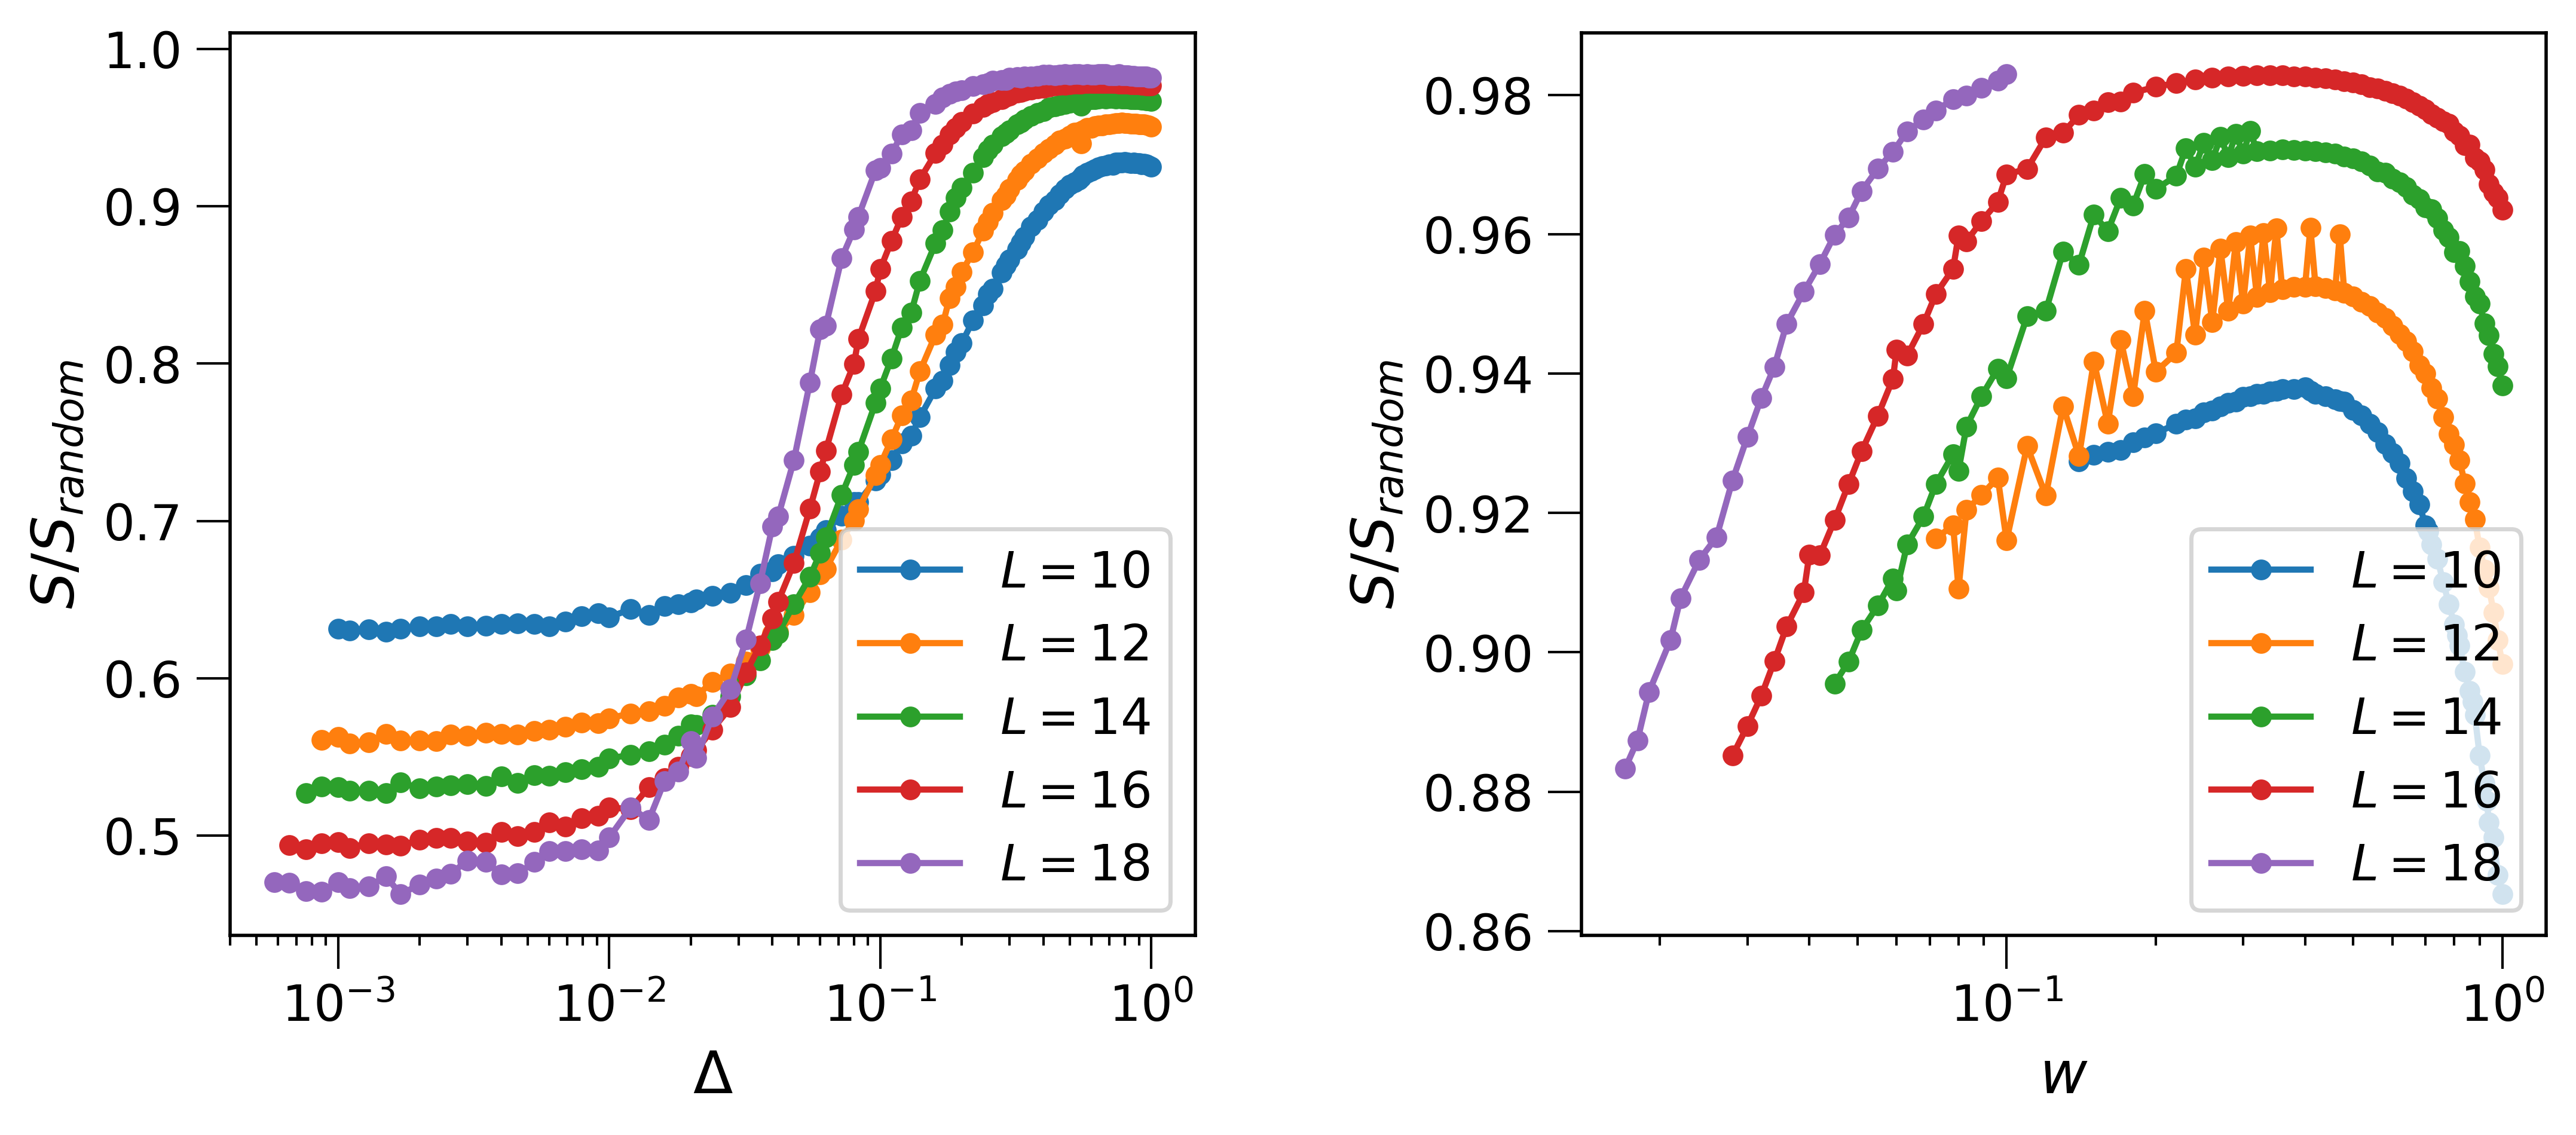

In [136]:
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(10,4), dpi = 500)

set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('g')
settings = getattr(set_class, 'settings')

sizes, xarray, entropy, wH = get_entropy(settings, normalize=True)
plot_raw_data(axis=ax1, settings=settings, x=xarray, y=entropy, sizes=sizes)

print(xarray[-2])

set_class = copy.deepcopy(cf.plot_settings)
set_class.set_scaling('L')
set_class.set_vs('w')
settings = getattr(set_class, 'settings')


sizes, xarray, entropy, wH = get_entropy(settings, normalize=True)
plot_raw_data(axis=ax2, settings=settings, x=xarray, y=entropy, sizes=sizes)

fig.subplots_adjust(wspace=0.4, hspace=0.3)

plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA4.pdf")
plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA4.png")

#ax1.set_xlim(5e-3, 5e-1)
#ax1.set_ylim(0.45, 0.9)
S_c = [0.083, 0.044, 0.031, 0.023]
#for Sc in S_c:
#    ax1.axvline(x=Sc, linestyle = '--', color = 'black')

# OTHER TESTS

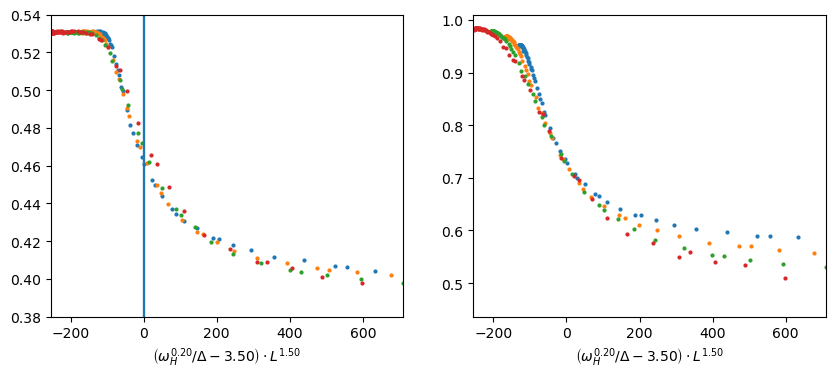

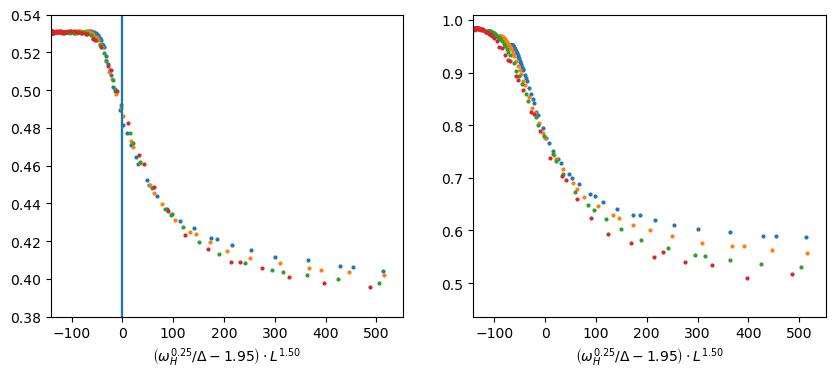

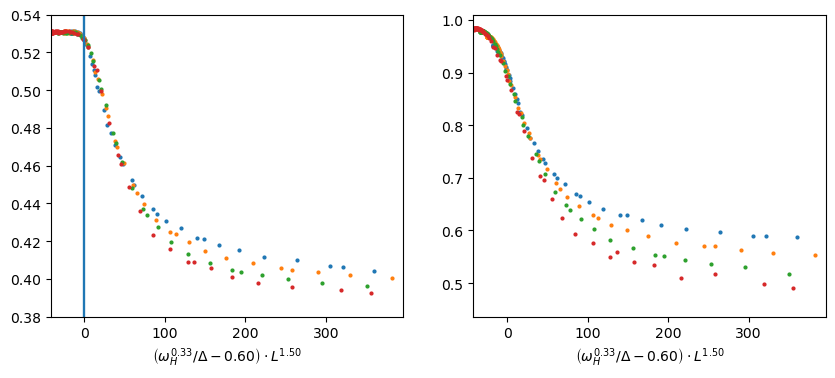

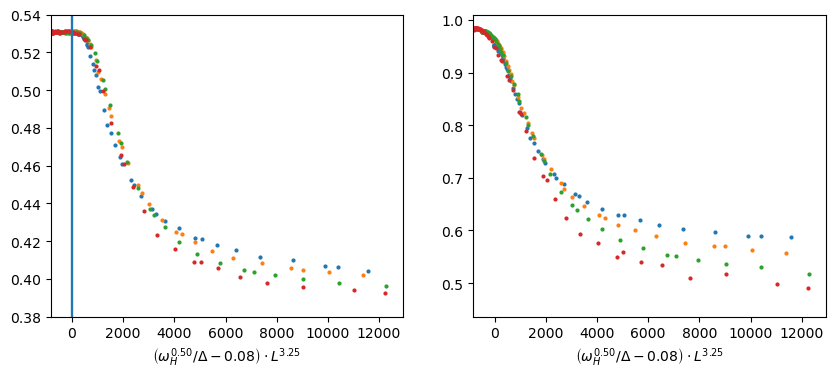

In [ ]:
from numpy import size


reload_modules()


sizes = np.array(range(12,19,2))

def get_and_plot_data(vs = 'g', alfa = 0.5, shift = 0.8, exp = 1.0):
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_scaling('L')
    set_class.set_vs(vs)
    settings = getattr(set_class, 'settings')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), dpi = 100)
    x = []
    r = []
    S = []
    wHtot = []
    idx = 0
    for L in sizes:
        cf.params_arr[settings['scaling_idx']] = L
        filename = cf.base_directory + "STATISTICS" + os.sep + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat" 
        
        if os.path.exists(filename):
            stats = hfun.read_python_saved_dat_file(filename)
            r_tmp = stats[1]
            x.append([stats[0][i]for i, r in enumerate(r_tmp) if r > 0.0])
            r.append([stats[1][i] for i, r in enumerate(r_tmp) if r > 0.0])
            wHtot.append(np.array([stats[5][i] for i, r in enumerate(r_tmp) if r > 0.0]))

            ooo = 0
            idx = 0
            while ooo < 0.4:    ooo = r_tmp[idx];  idx += 1;
            norm = L * np.log(2) / 2. + (0.5 - np.log(2)) / 2. - 0.5
            S.append([stats[4][i] / norm for i, r in enumerate(r_tmp) if r > 0.0])
    
    wH = np.sqrt(sizes) / binom(sizes, sizes / 2)
    xmax = []
    xmin = []
    wHtot = np.array(wHtot)
    for i, L in enumerate(sizes):
        xval = ( 1./(x[i] / wHtot[i]**alfa) - shift) * L**exp
        xmax.append(xval[idx])
        xmin.append(min(xval))
        axes[0].scatter(xval, r[i], label=r"$L=%d$"%L, s=4)
        axes[1].scatter(xval, S[i], label=r"$L=%d$"%L, s=4)
        axes[0].axvline(x=0)
    
    lab = hfun.var_name if settings['vs_idx'] == 2 else settings['vs']
    for i in [0, 1]:
        axes[i].set_xscale('linear')
        axes[i].set_xlim(min(xmin),1.5 * max(xmax))
        axes[0].set_ylim(0.38,0.54)
        axes[i].set_xlabel(r"$\left(\omega_H^{%.2f}/%s-%.2f\right)\cdot L^{%.2f}$"%(alfa, lab, shift, exp))
    
    #-- GET scaling things
    
    g_c_dev_GOE = []
    for i, L in enumerate(sizes):
        idx = 0
        var = 0
        while var < 0.525: var = r[i][idx];  idx += 1;
        g_c_dev_GOE.append(x[i][idx])
    return g_c_dev_GOE




w_c_dev_GOE = get_and_plot_data(vs = 'g', alfa = 0.2, shift=3.5, exp = 1.5)
w_c_dev_GOE = get_and_plot_data(vs = 'g', alfa = 0.25, shift=1.95, exp = 1.5)
g_c_dev_GOE = get_and_plot_data(vs = 'g', alfa = 0.33, shift=0.6, exp = 1.5)
w_c_dev_GOE = get_and_plot_data(vs = 'g', alfa = 0.5, shift=0.08, exp = 3.25)


[2.19443031 6.66377943]
[ 2.37380994 16.0871132 ]
[  2.91260922 405.97267464]
[4.09789631e+00 6.88895791e+03]
[6.19694019 0.19758068]
[5.75686033 0.35357739]
[4.86376468 3.41374396]
[3.40066491 8.81551728]


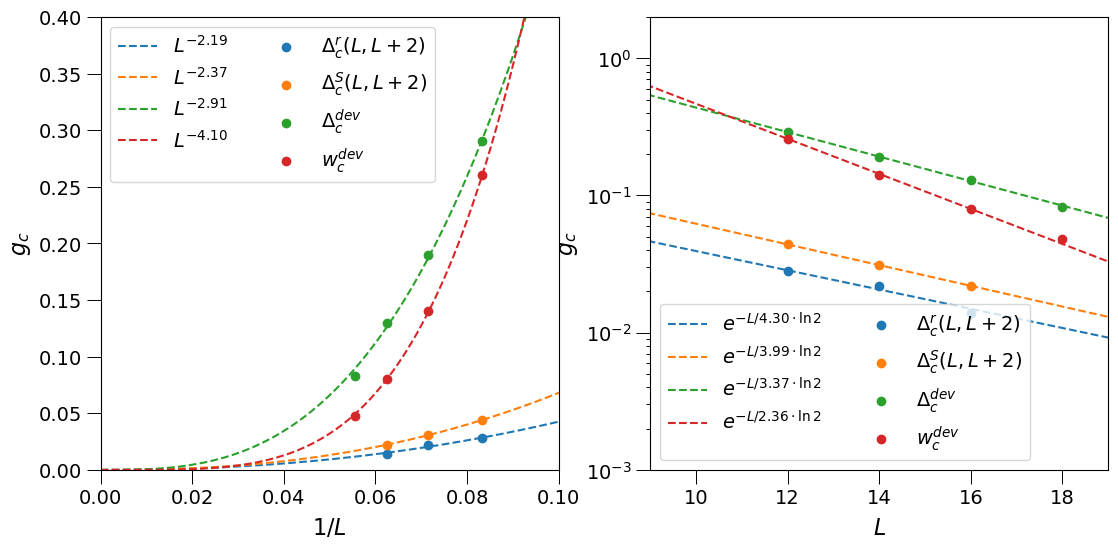

In [ ]:





g_c_crossing = [0.028, 0.022, 0.014]
S_c_crossing = [0.044, 0.031, 0.022]

fig, (axis, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(13,6), dpi = 100)

def ploT(ax, x, y, label, fitter = power_law):
    pars, pcov = fit(f=fitter, 
                xdata=x, 
                ydata=y)
    aa = np.linspace(0.0, 1.0, 1000) if fitter == power_law else np.linspace(8.0, 20.0, 1000)
    print(pars)
    p = ax.plot(aa, fitter(aa, *pars), linestyle='--', label=r"$L^{-%.2f}$"%pars[0] if fitter == power_law else r"$e^{-L/%.2f\cdot\ln2}$"%(pars[0]*np.log(2)))
    ax.scatter(x, y, label=label, color=p[0].get_color())
axis.set_xlim(0, 0.1)
axis.set_ylim(0, 0.4)
ploT(ax = axis, x=1. / (sizes[:-1]), y=g_c_crossing, label=r"$\Delta_c^r(L, L+2)$", fitter = power_law) 
ploT(ax = axis, x=1. / (sizes[:-1]), y=S_c_crossing, label=r"$\Delta_c^S(L, L+2)$", fitter=power_law)            
ploT(ax = axis, x=1. / (sizes), y=g_c_dev_GOE, label=r"$\Delta_c^{dev}$", fitter = power_law)
ploT(ax = axis, x=1. / (sizes), y=w_c_dev_GOE, label=r"$w_c^{dev}$", fitter = power_law)
hfun.set_plot_elements(axis = axis, ylabel = "g_c", xlabel = "1/L", settings=settings, 
                            font_size=14, set_legend=False, xlim=(None, None), ylim=(None, None))
axis.set_xscale('linear')
axis.set_yscale('linear')
axis.legend(frameon=True, ncol=2
                , loc='best'
                , fontsize=14)

ploT(ax = axis2, x=(sizes[:-1]), y=g_c_crossing, label=r"$\Delta_c^r(L, L+2)$", fitter=exp_fit)
ploT(ax = axis2, x=(sizes[:-1]), y=S_c_crossing, label=r"$\Delta_c^S(L, L+2)$", fitter=exp_fit)            
ploT(ax = axis2, x=(sizes), y=g_c_dev_GOE, label=r"$\Delta_c^{dev}$", fitter=exp_fit)
ploT(ax = axis2, x=(sizes), y=w_c_dev_GOE, label=r"$w_c^{dev}$", fitter=exp_fit)
hfun.set_plot_elements(axis = axis2, ylabel = "g_c", xlabel = "L", settings=settings, 
                            font_size=14, set_legend=False, xlim=(None, None), ylim=(None, None))
axis2.set_xscale('linear')
axis2.set_yscale('log')
axis2.set_xlim(9, 19)
axis2.set_ylim(1e-3, 2.0)
axis2.legend(frameon=True, ncol=2
                , loc='best'
                , fontsize=14)